#data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
df2 = pd.read_csv('/content/drive/MyDrive/제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보 (1).csv')
df3 = pd.read_csv('/content/drive/MyDrive/제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
df4 = pd.read_csv('/content/drive/MyDrive/제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1['clnt_gender'] = 'unknown'
df1['clnt_age'] = 'unknown'
for j in ['M', 'F']:
  for i in df3['clnt_id'][df3['clnt_gender'] == j]:
    df1['clnt_gender'][df1['clnt_id'] == i] = j
for j in ['10', '20', '30', '40', '50', '60']:
  for i in df3['clnt_id'][df3['clnt_age'] == j]:
    df1['clnt_age'][df1['clnt_id'] == i] = j

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
group_id_list = []
id_set = list(set(df1['clnt_id']))
for i in tqdm(id_set):
  for j in list(set(df1['sess_id'][df1['clnt_id'] == i])):
    group_id_list.append([i, j])

100%|██████████| 72399/72399 [06:07<00:00, 196.74it/s]


In [ ]:
group_df_list = []
for i in tqdm(group_id_list): 
  group_df_list.append(df1[(df1['clnt_id'] == i[0]) & (df1['sess_id'] == i[1])])

100%|██████████| 367149/367149 [1:17:34<00:00, 78.89it/s]


In [ ]:
time_series_df = pd.DataFrame()
for i in tqdm(group_df_list):
  time_series_dict = {}
  time_series_dict['clnt_id'] = list(i['clnt_id'])[0]
  time_series_dict['clnt_gender'] = list(i['clnt_gender'])[0]
  time_series_dict['clnt_age'] = list(i['clnt_age'])[0]
  time_series_dict['trfc_src'] = list(i['trfc_src'])[0]
  time_series_dict['dvc_ctg_nm'] = list(i['dvc_ctg_nm'])[0]
  df = i.iloc[:, [2, 3]]
  df.sort_values(by = 'hit_seq', inplace = True)
  action_type_list = list(df['action_type'])
  time_series_dict['num_action_type'] = len(action_type_list)
  time_series_dict['action_types'] = ','.join([str(l) for l in action_type_list])
  if sum(i['trans_id'].notna()) > 0:
    trans_id_df = i[i['trans_id'].notna()]
    trans_id_df.sort_values(by = 'hit_seq', inplace = True)
    time_series_dict['index_trans_id'] = '/'.join([str(l) for l in list(trans_id_df['hit_seq'].values)])
    pd_c_list = []
    clac_nm1_list = []
    clac_nm2_list = []
    clac_nm3_list = []
    for j in range(len(trans_id_df['clnt_id'])):
      df = trans_id_df.iloc[j, :]
      pd_c = df2['pd_c'][df2['trans_id'] == df['trans_id']].values
      pd_c_list.append(pd_c)
      for k in pd_c:
        clac_nm1 = []
        clac_nm2 = []
        clac_nm3 = []
        if k == 'unknown':
          clac_nm1.append('unknown')
          clac_nm2.append('unknown')
          clac_nm3.append('unknown')
        else:
          k = int(k)
          clac_nm_series = df4[df4['pd_c'] == k]
          clac_nm1.append(str(list(clac_nm_series['clac_nm1'])[0]))
          clac_nm2.append(str(list(clac_nm_series['clac_nm2'])[0]))
          clac_nm3.append(str(list(clac_nm_series['clac_nm3'])[0]))
      clac_nm1_list.append(','.join(clac_nm1))
      clac_nm2_list.append(','.join(clac_nm2))
      clac_nm3_list.append(','.join(clac_nm3))
    time_series_dict['clac_nm1'] = '/'.join(clac_nm1_list)
    time_series_dict['clac_nm2'] = '/'.join(clac_nm2_list)
    time_series_dict['clac_nm3'] = '/'.join(clac_nm3_list)
  time_series_df = time_series_df.append(time_series_dict, ignore_index = True)

  0%|          | 0/367149 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
100%|██████████| 367149/367149 [4:02:43<00:00, 25.21it/s]


In [ ]:
time_series_df

clnt_id clnt_gender clnt_age trfc_src  dvc_ctg_nm  num_action_type  \
0           1.0     unknown  unknown  unknown  mobile_app              3.0   
1           1.0     unknown  unknown  unknown  mobile_app              7.0   
2           2.0           F       30   DIRECT         NaN             43.0   
3           2.0           F       30   DIRECT         NaN              6.0   
4           2.0           F       30   DIRECT         NaN              5.0   
...         ...         ...      ...      ...         ...              ...   
367144  72428.0     unknown  unknown  unknown  mobile_app              1.0   
367145  72428.0     unknown  unknown  unknown  mobile_app              3.0   
367146  72428.0     unknown  unknown  unknown  mobile_app              1.0   
367147  72428.0     unknown  unknown  unknown  mobile_app              1.0   
367148  72429.0     unknown  unknown   DIRECT  mobile_web              2.0   

                                             action_types   clac_nm1  \
0                                                   0,0,0        NaN   
1                                           0,0,0,0,0,0,0        NaN   
2       0,1,2,0,0,3,5,5,0,1,2,0,0,0,5,5,1,2,5,1,2,5,5,...  Beverages   
3                                             5,5,2,2,2,2        NaN   
4                                               5,5,3,5,5        NaN   
...                                                   ...        ...   
367144                                                  0        NaN   
367145                                              0,0,0        NaN   
367146                                                  0        NaN   
367147                                                  0        NaN   
367148                                                1,2        NaN   

             clac_nm2       clac_nm3 index_trans_id  
0                 NaN            NaN            NaN  
1                 NaN            NaN            NaN  
2       Coffee Drinks  Coffee Drinks             37  
3                 NaN            NaN            NaN  
4                 NaN            NaN            NaN  
...               ...            ...            ...  
367144            NaN            NaN            NaN  
367145            NaN            NaN            NaN  
367146            NaN            NaN            NaN  
367147            NaN            NaN            NaN  
367148            NaN            NaN            NaN  

[367149 rows x 11 columns]

In [ ]:
time_series_df.to_csv('/content/drive/MyDrive/Lpoint hit seq time series.csv', index = False)

# time series clustering

In [ ]:
!pip install tslearn

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KernelKMeans
from tslearn.clustering import KShape
from tslearn.clustering import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lpoint hit seq time series.csv')

In [ ]:
df.describe()

clnt_id  num_action_type
count  367149.000000    367149.000000
mean    36203.657858         8.705899
std     21188.471488        15.170861
min         1.000000         1.000000
25%     17706.000000         1.000000
50%     36052.000000         3.000000
75%     54850.000000         9.000000
max     72429.000000       357.000000

## len 7 ~ 9

In [ ]:
df79 = df[(df['num_action_type'] < 10) & (df['num_action_type'] > 6)]
x79 = []
for i in tqdm(df79['action_types'].values):
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = 1 + int(e)
  if len(ilist) == 7:
    ilist = ilist + [0, 0]
  elif len(ilist) == 8:
    ilist = ilist + [0]
  else:
    pass
  x79.append(ilist)
x79 = np.array(x79)

100%|██████████| 27229/27229 [00:00<00:00, 182666.43it/s]


In [ ]:
x79

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 2, 3, ..., 3, 0, 0],
       [1, 2, 3, ..., 6, 0, 0],
       ...,
       [6, 6, 6, ..., 7, 8, 0],
       [3, 6, 4, ..., 6, 6, 7],
       [3, 1, 2, ..., 1, 2, 0]])

In [ ]:
sum = 0
for i in x79:
  if 7 in i:
    sum = sum + 1
print(sum / len(x79))

0.14866502625876823


### model(3 cluster)

#### kmean

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=100, random_state=0)

In [ ]:
km_pred = km.fit_predict(x79)

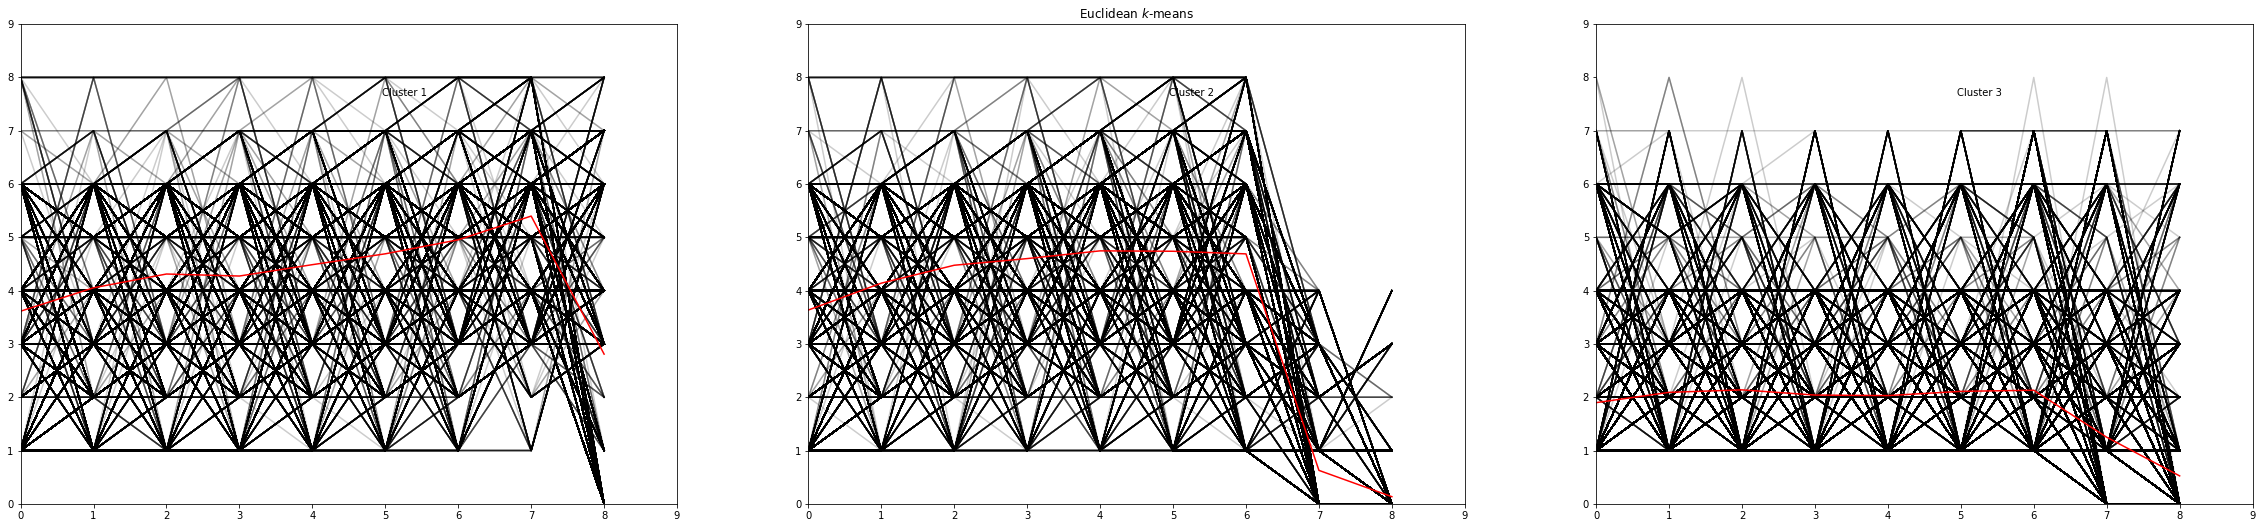

In [ ]:
plt.figure(figsize=(40, 30))
sz = x79.shape[1]
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in x79[km_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [ ]:
silhouette_score(x79, km_pred, metric="euclidean")

0.2856155509291053

####kshape

In [ ]:
ks = KShape(n_clusters=3, max_iter=5, random_state=0)

In [ ]:
ks_pred = ks.fit_predict(x79)

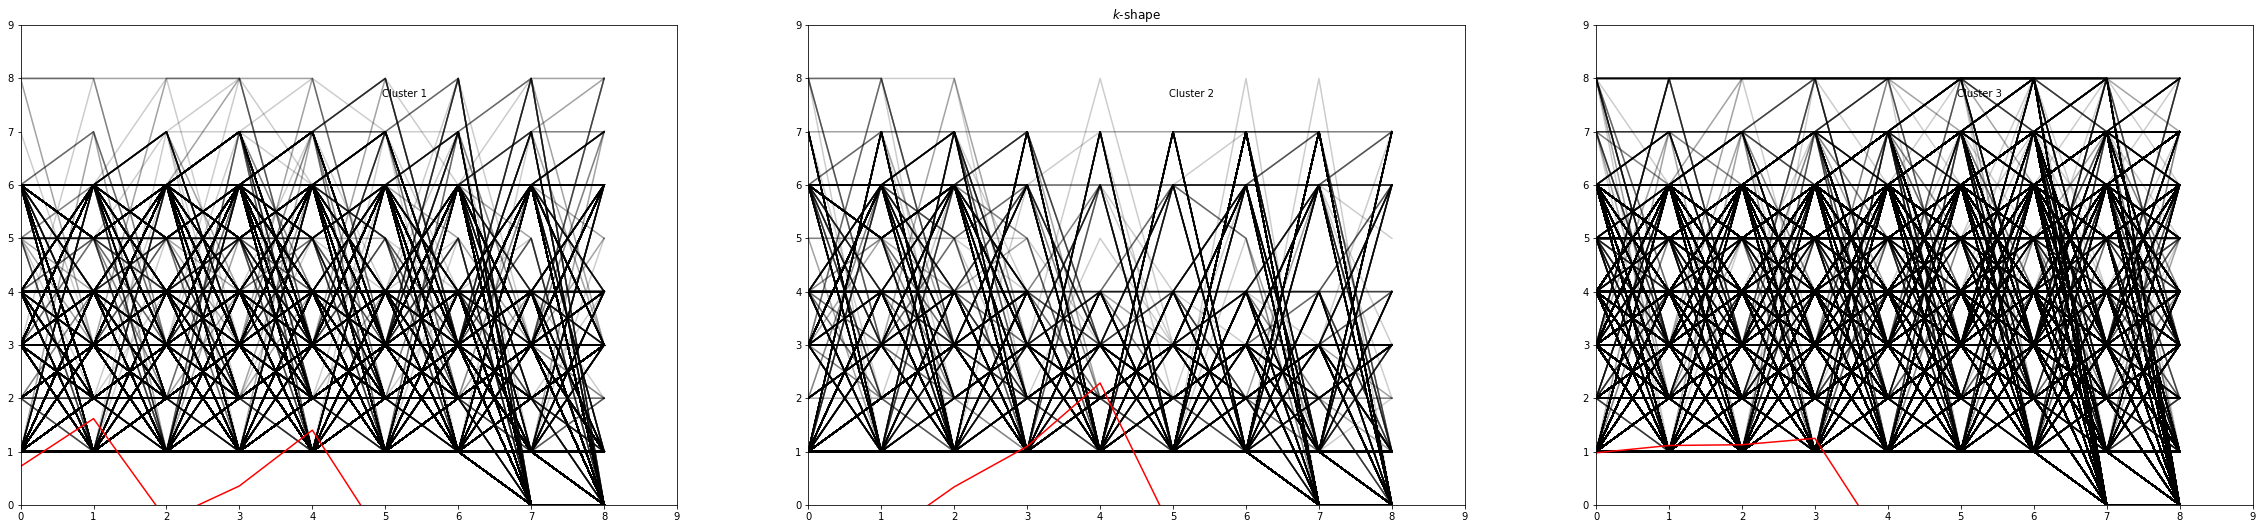

In [ ]:
plt.figure(figsize=(40, 30))
sz = x79.shape[1]
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in x79[ks_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-shape")

In [ ]:
silhouette_score(x79, ks_pred)

####kernerkmean

In [ ]:
kkm = KernelKMeans(n_clusters=3, max_iter=5, random_state=0)

In [ ]:
kkm_pred = kkm.fit_predict(x79)

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 27229 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [ ]:
plt.figure(figsize=(40, 30))
sz = x79.shape[1]
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in x79[kkm_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kkm.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("kernel-$k$-mean")

In [ ]:
silhouette_score(x79, kkm_pred)

### max iter

100%|██████████| 99/99 [1:06:00<00:00, 40.01s/it]


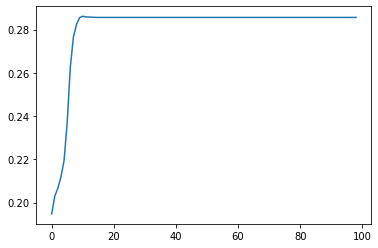

In [ ]:
score_list = []
for max_iter in tqdm(range(1, 100)):
  km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=max_iter, random_state=0)
  km_pred = km.fit_predict(x79)
  score_list.append(silhouette_score(x79, km_pred, metric="euclidean"))
plt.plot(score_list)

In [ ]:
max_iter = np.argmax(score_list)
max_iter

10

###cluster

100%|██████████| 18/18 [08:28<00:00, 28.25s/it]


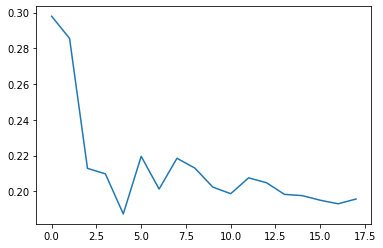

In [ ]:
score_list = []
for n_clusters in tqdm(range(2, 20)):
  km = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=max_iter, random_state=0)
  km_pred = km.fit_predict(x79)
  score_list.append(silhouette_score(x79, km_pred, metric="euclidean"))
plt.plot(score_list)

In [ ]:
score_list

[0.2979468357141946,
 0.2855309098337392,
 0.21284108438533034,
 0.2097840380975189,
 0.18736443310102704,
 0.2195857523671209,
 0.2012669365244424,
 0.2185020045846853,
 0.21297686615293918,
 0.20237028349780903,
 0.19868029881877497,
 0.2075325142401491,
 0.20480391355472527,
 0.1983128257921901,
 0.1975850102457087,
 0.19501998483332364,
 0.19303089277153382,
 0.19570146602499383]

### 최적 hyperparameter (max_iter = 10, cluster = 7)

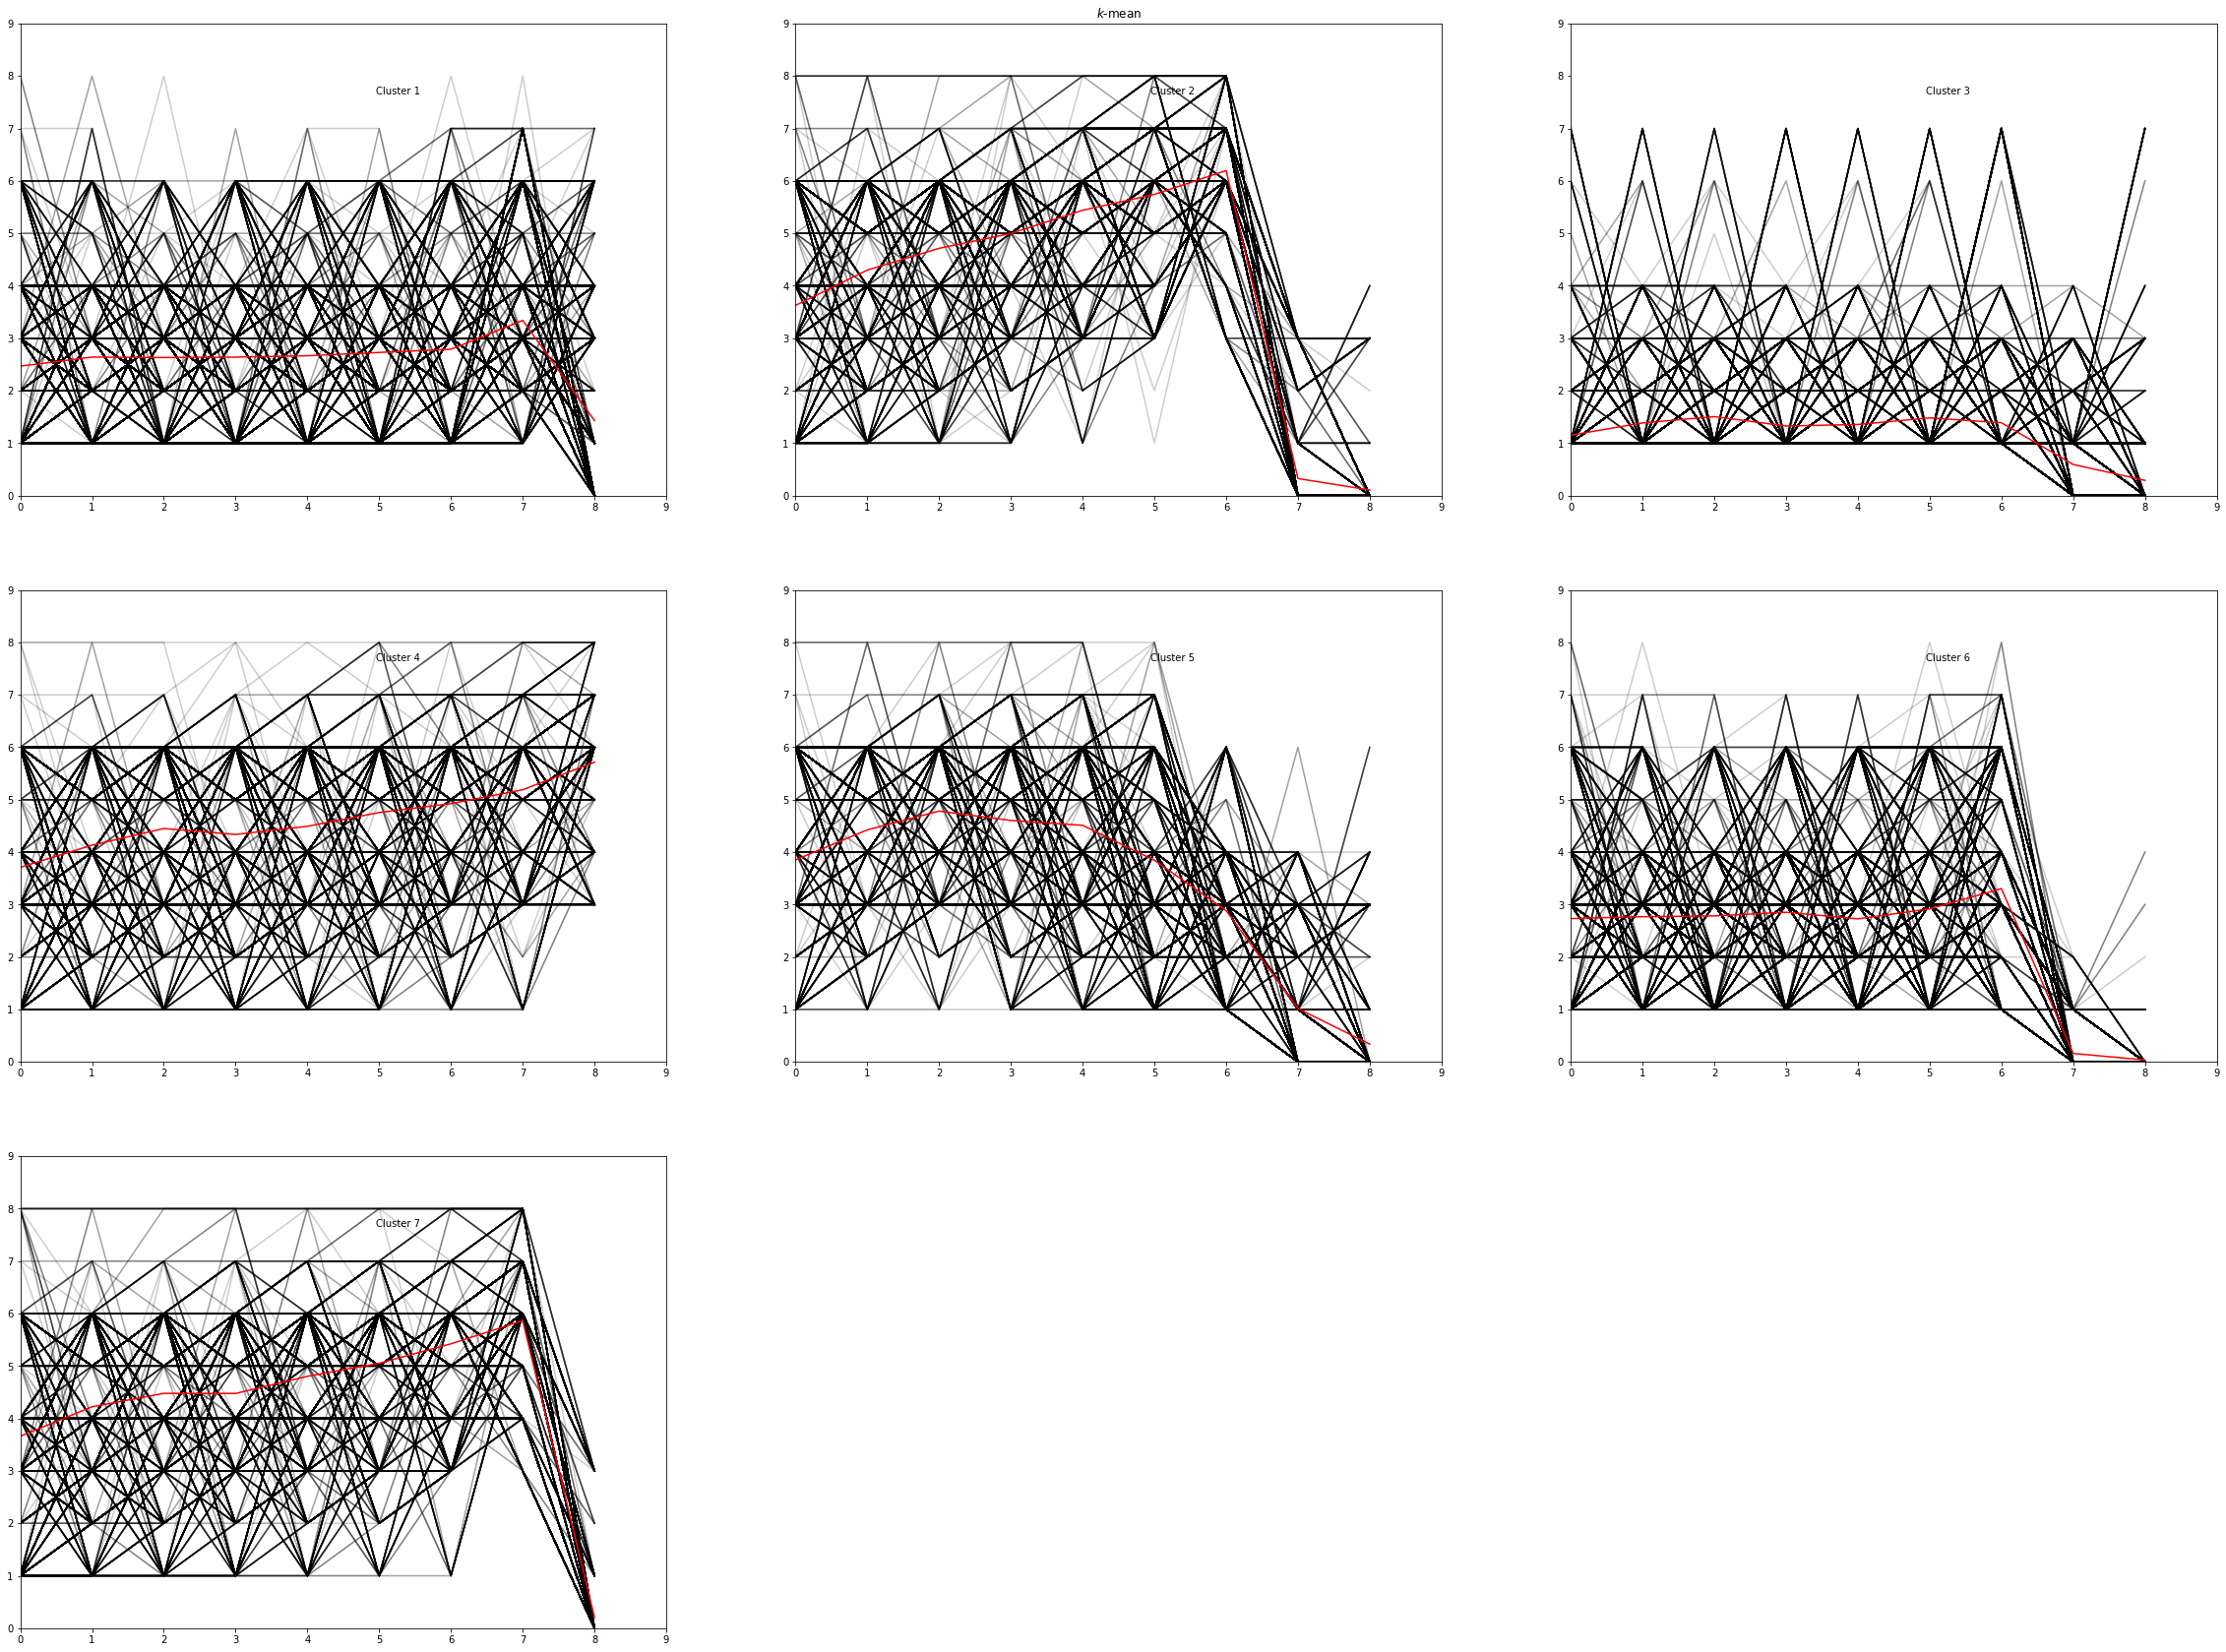

In [ ]:
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=10, random_state=0)
km_pred = km.fit_predict(x79)
plt.figure(figsize=(40, 30))
sz = x79.shape[1]
for yi in range(7):
    plt.subplot(3, 3, yi + 1)
    for xx in x79[km_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-mean")

In [ ]:
df79['cluster'] = km_pred
df79

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


clnt_id clnt_gender clnt_age trfc_src  dvc_ctg_nm  num_action_type  \
1           1.0     unknown  unknown  unknown  mobile_app              7.0   
8           2.0           F       30   DIRECT         NaN              7.0   
15          2.0           F       30   DIRECT         NaN              7.0   
21          2.0           F       30   DIRECT         NaN              9.0   
28          7.0     unknown  unknown     PUSH         NaN              9.0   
...         ...         ...      ...      ...         ...              ...   
367093  72408.0     unknown  unknown  unknown  mobile_web              8.0   
367099  72410.0           F       40  unknown          PC              9.0   
367107  72415.0     unknown  unknown  unknown  mobile_web              8.0   
367117  72415.0     unknown  unknown  unknown  mobile_web              9.0   
367138  72426.0     unknown  unknown   DIRECT  mobile_web              8.0   

             action_types                       clac_nm1  \
1           0,0,0,0,0,0,0                            NaN   
8           0,1,2,3,5,5,2                            NaN   
15          0,1,2,3,5,5,5                            NaN   
21      0,0,0,3,0,0,0,0,0                            NaN   
28      1,2,5,0,0,1,2,0,0                            NaN   
...                   ...                            ...   
367093    2,1,2,1,2,1,2,2                            NaN   
367099  2,2,2,2,5,5,5,6,0                 Dairy Products   
367107    5,5,5,3,5,6,6,7  Dairy Products/Dairy Products   
367117  2,5,3,4,5,2,5,5,6                 Dairy Products   
367138    2,0,1,2,0,2,0,1                            NaN   

                                                 clac_nm2       clac_nm3  \
1                                                     NaN            NaN   
8                                                     NaN            NaN   
15                                                    NaN            NaN   
21                                                    NaN            NaN   
28                                                    NaN            NaN   
...                                                   ...            ...   
367093                                                NaN            NaN   
367099                           Processed Dairy Products         Cheese   
367107  Processed Dairy Products/Processed Dairy Products  Cheese/Cheese   
367117                           Processed Dairy Products         Cheese   
367138                                                NaN            NaN   

       index_trans_id  cluster  
1                 NaN        2  
8                 NaN        5  
15                NaN        1  
21                NaN        2  
28                NaN        5  
...               ...      ...  
367093            NaN        0  
367099              8        6  
367107            6/8        6  
367117              9        3  
367138            NaN        2  

[27229 rows x 12 columns]

In [ ]:
df79.to_csv('/content/drive/MyDrive/Lpoint hit seq time series79.csv', index = False)

## len 8

In [ ]:
df8 = df[df['num_action_type'] == 8]
x8 = []
for i in tqdm(df8['action_types'].values):
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = 1 + int(e)
  x8.append(ilist)
x8 = np.array(x8)

100%|██████████| 8837/8837 [00:00<00:00, 111560.11it/s]


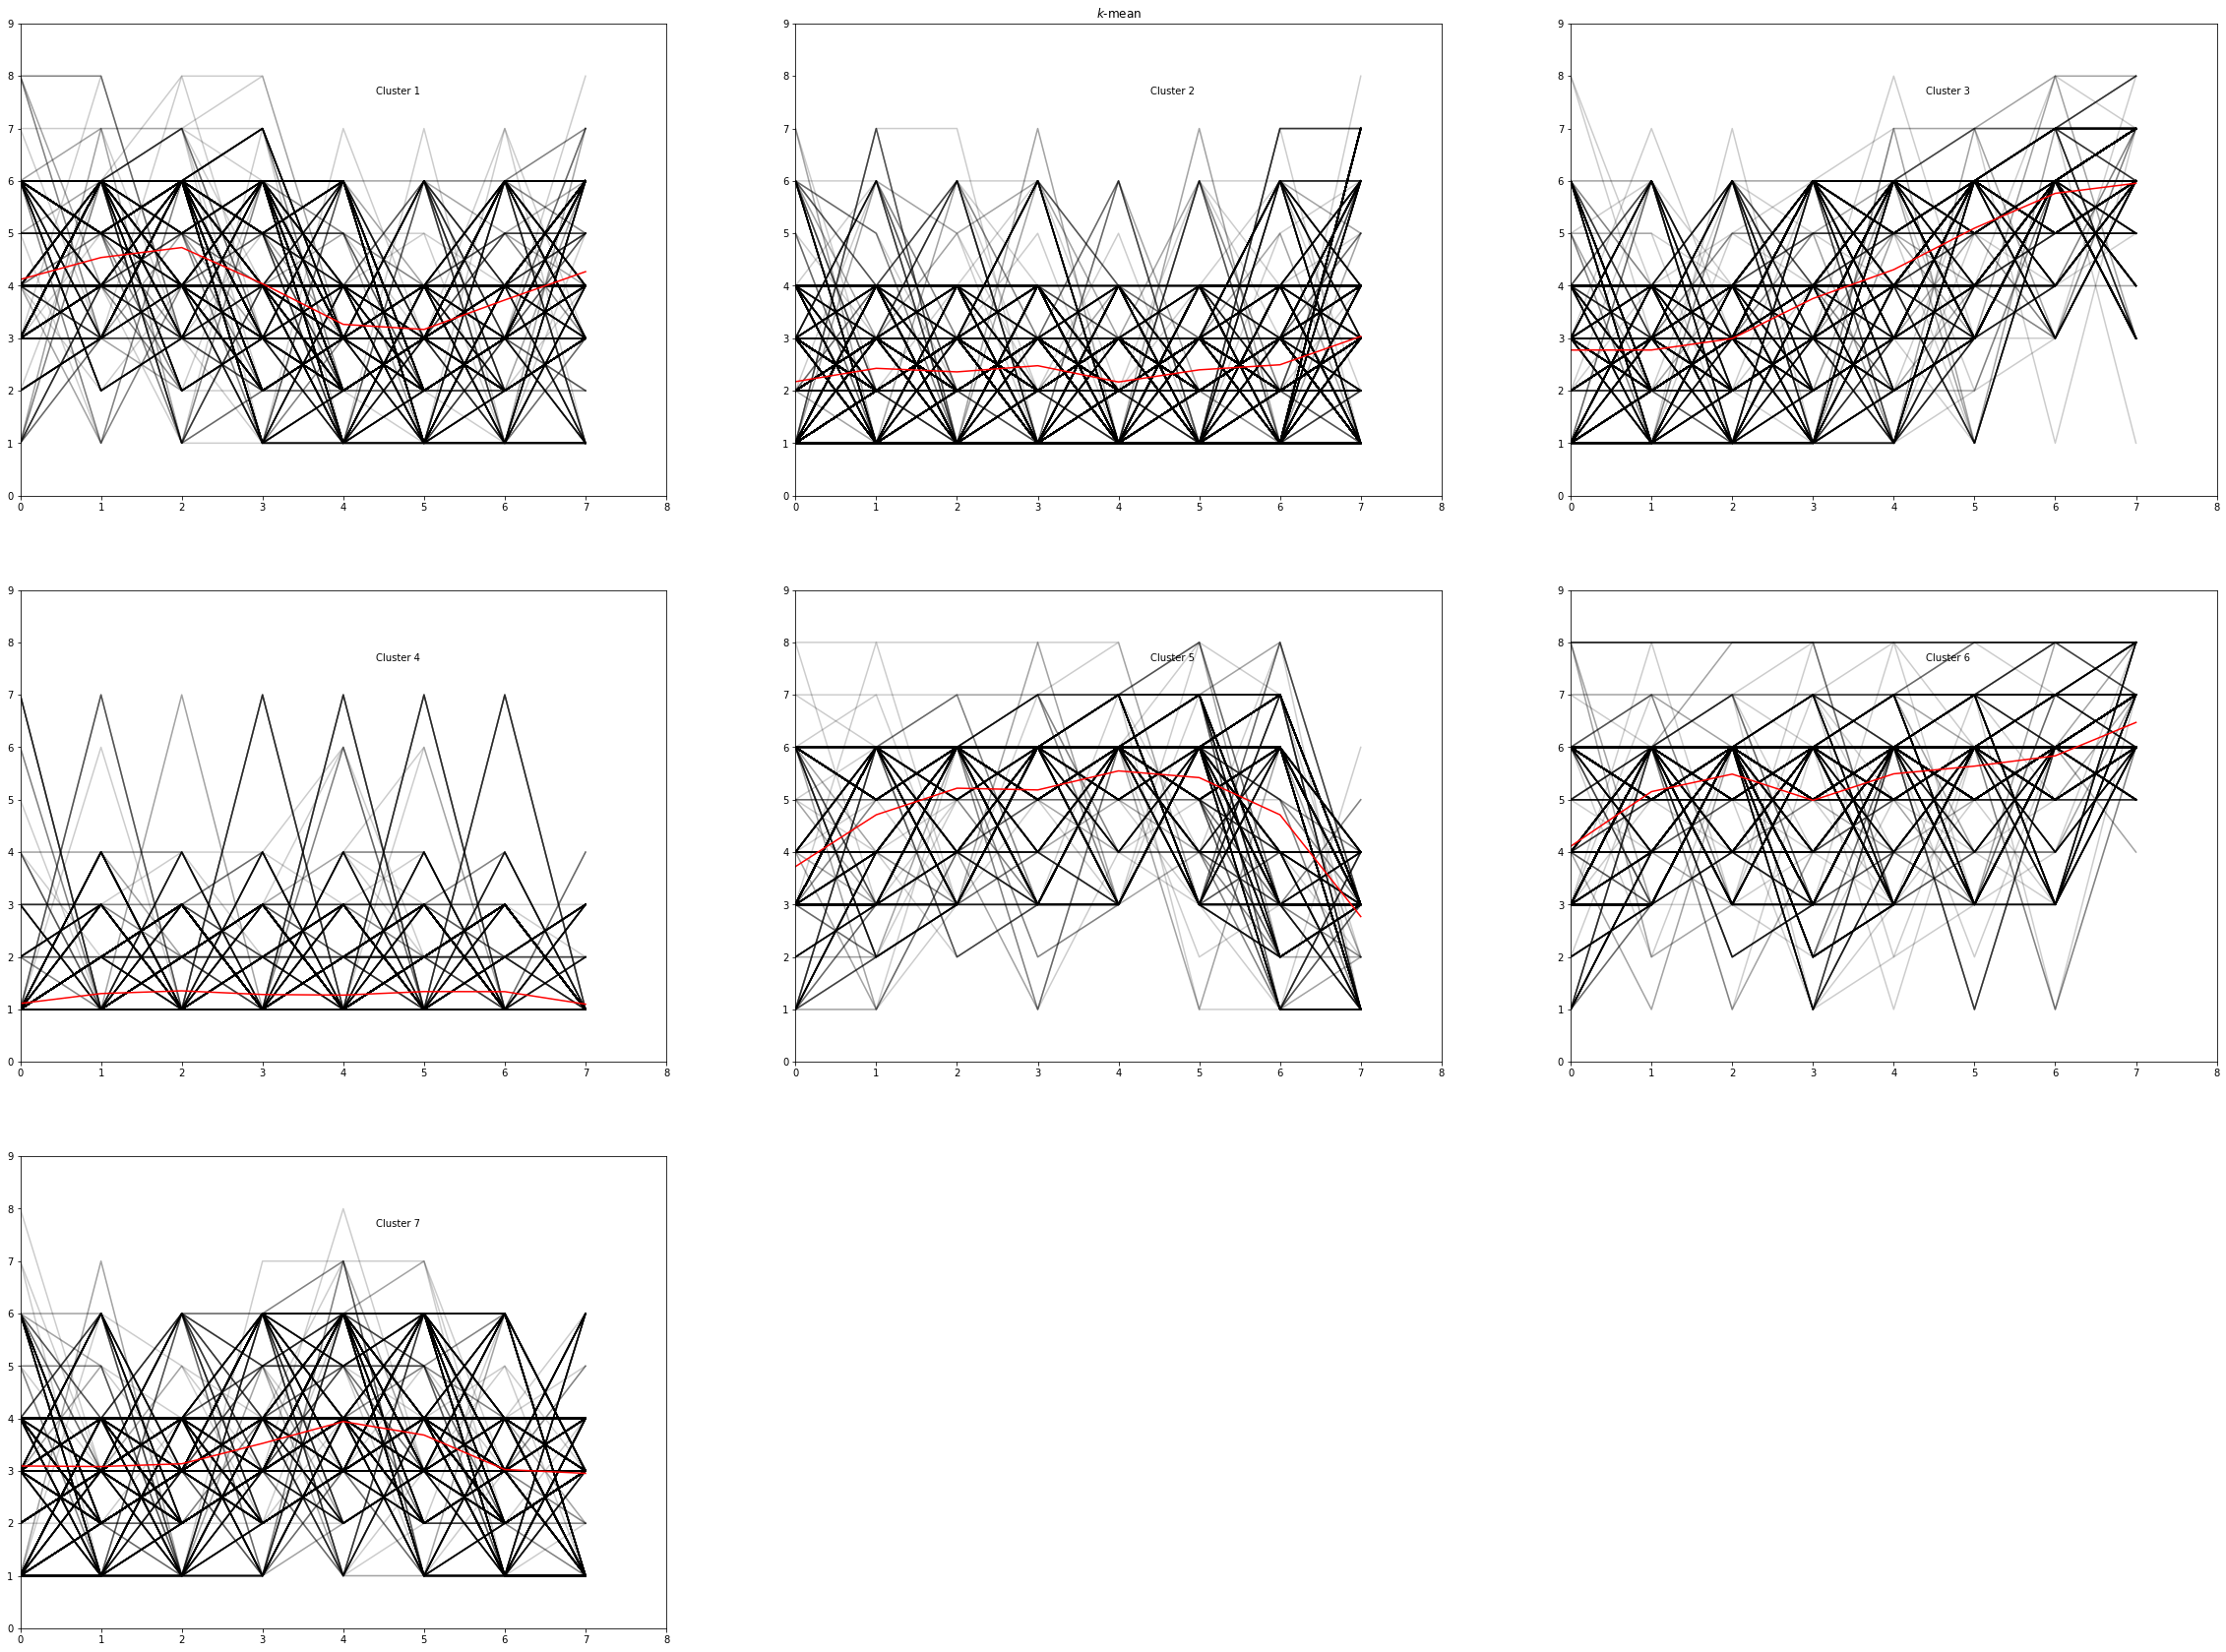

In [ ]:
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=10, random_state=0)
km_pred = km.fit_predict(x8)
plt.figure(figsize=(40, 30))
sz = x8.shape[1]
for yi in range(7):
    plt.subplot(3, 3, yi + 1)
    for xx in x8[km_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-mean")

In [ ]:
silhouette_score(x8, km_pred)

In [ ]:
df8['cluster'] = km_pred
df8

In [ ]:
df8.to_csv('/content/drive/MyDrive/Lpoint hit seq time series8.csv', index = False)

## len 4

In [ ]:
df4 = df[df['num_action_type'] == 5]
x4 = []
for i in tqdm(df4['action_types'].values):
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = 1 + int(e)
  x4.append(ilist)
x4 = np.array(x4)

In [ ]:
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=10, random_state=0)
km_pred = km.fit_predict(x4)
plt.figure(figsize=(40, 30))
sz = x4.shape[1]
for yi in range(7):
    plt.subplot(3, 3, yi + 1)
    for xx in x4[km_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-mean")

In [ ]:
silhouette_score(x4, km_pred)

In [ ]:
df4['cluster'] = km_pred
df4

In [ ]:
df4.to_csv('/content/drive/MyDrive/Lpoint hit seq time series4.csv', index = False)

# forecast action type

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
from sklearn.model_selection import train_test_split

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, a, b):
        self.a = a
        self.b = b       

    def __len__(self):
        return len(self.a)      

    def __getitem__(self, idx):
        return self.a[idx], self.b[idx]

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

## len 8

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 7
input_size = 8
hidden_size = 128
num_layers = 2
num_classes = 8
batch_size = 512
num_epochs = 100
learning_rate = 0.01

In [ ]:
df8 = pd.read_csv('/content/drive/MyDrive/Lpoint hit seq time series8.csv')

### no cluster

In [ ]:
x8n = []
y8n = []
for i in tqdm(df8['action_types'].values):
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = int(e)
  x8n.append(ilist[:7])
  y8n.append(ilist[-1])
x8n = np.array(x8n)
y8n = np.array(y8n)

100%|██████████| 8837/8837 [00:00<00:00, 191000.91it/s]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x8n, y8n)
train = CustomDataset(X_train, Y_train)
test = CustomDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

In [ ]:
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in tqdm(range(num_epochs)):
    train_loss = 0.0
    for i, (data, labels) in enumerate(train_loader):
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)

        
        # Forward pass
        outputs = model(data.to(torch.float))
        loss = criterion(outputs, labels.to(torch.int64))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

  1%|          | 1/100 [00:02<03:32,  2.15s/it]

Epoch [1/100], Loss: 1.5904


  2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Epoch [2/100], Loss: 1.2583


  3%|▎         | 3/100 [00:06<03:27,  2.14s/it]

Epoch [3/100], Loss: 1.0994


  4%|▍         | 4/100 [00:08<03:25,  2.14s/it]

Epoch [4/100], Loss: 0.9875


  5%|▌         | 5/100 [00:10<03:27,  2.18s/it]

Epoch [5/100], Loss: 0.9114


  6%|▌         | 6/100 [00:12<03:23,  2.16s/it]

Epoch [6/100], Loss: 0.8777


  7%|▋         | 7/100 [00:15<03:24,  2.20s/it]

Epoch [7/100], Loss: 0.8609


  8%|▊         | 8/100 [00:17<03:24,  2.23s/it]

Epoch [8/100], Loss: 0.8411


  9%|▉         | 9/100 [00:19<03:20,  2.20s/it]

Epoch [9/100], Loss: 0.8296


 10%|█         | 10/100 [00:22<03:26,  2.30s/it]

Epoch [10/100], Loss: 0.8249


 11%|█         | 11/100 [00:24<03:20,  2.25s/it]

Epoch [11/100], Loss: 0.8066


 12%|█▏        | 12/100 [00:26<03:23,  2.31s/it]

Epoch [12/100], Loss: 0.7987


 13%|█▎        | 13/100 [00:28<03:17,  2.27s/it]

Epoch [13/100], Loss: 0.7852


 14%|█▍        | 14/100 [00:31<03:17,  2.30s/it]

Epoch [14/100], Loss: 0.7757


 15%|█▌        | 15/100 [00:33<03:15,  2.30s/it]

Epoch [15/100], Loss: 0.7674


 16%|█▌        | 16/100 [00:35<03:13,  2.30s/it]

Epoch [16/100], Loss: 0.7543


 17%|█▋        | 17/100 [00:38<03:07,  2.26s/it]

Epoch [17/100], Loss: 0.7357


 18%|█▊        | 18/100 [00:40<03:03,  2.24s/it]

Epoch [18/100], Loss: 0.7173


 19%|█▉        | 19/100 [00:42<02:59,  2.21s/it]

Epoch [19/100], Loss: 0.7033


 20%|██        | 20/100 [00:44<03:00,  2.26s/it]

Epoch [20/100], Loss: 0.6917


 21%|██        | 21/100 [00:47<02:58,  2.26s/it]

Epoch [21/100], Loss: 0.6799


 22%|██▏       | 22/100 [00:49<02:57,  2.28s/it]

Epoch [22/100], Loss: 0.6564


 23%|██▎       | 23/100 [00:51<03:01,  2.35s/it]

Epoch [23/100], Loss: 0.6402


 24%|██▍       | 24/100 [00:54<03:00,  2.37s/it]

Epoch [24/100], Loss: 0.6214


 25%|██▌       | 25/100 [00:56<03:03,  2.45s/it]

Epoch [25/100], Loss: 0.6068


 26%|██▌       | 26/100 [00:58<02:41,  2.19s/it]

Epoch [26/100], Loss: 0.5856


 27%|██▋       | 27/100 [01:00<02:25,  2.00s/it]

Epoch [27/100], Loss: 0.5795


 28%|██▊       | 28/100 [01:01<02:15,  1.88s/it]

Epoch [28/100], Loss: 0.5530


 29%|██▉       | 29/100 [01:03<02:06,  1.78s/it]

Epoch [29/100], Loss: 0.5325


 30%|███       | 30/100 [01:04<02:00,  1.71s/it]

Epoch [30/100], Loss: 0.5255


 31%|███       | 31/100 [01:06<01:54,  1.67s/it]

Epoch [31/100], Loss: 0.5101


 32%|███▏      | 32/100 [01:07<01:51,  1.65s/it]

Epoch [32/100], Loss: 0.5021


 33%|███▎      | 33/100 [01:09<01:49,  1.63s/it]

Epoch [33/100], Loss: 0.4913


 34%|███▍      | 34/100 [01:11<01:46,  1.61s/it]

Epoch [34/100], Loss: 0.4865


 35%|███▌      | 35/100 [01:12<01:43,  1.60s/it]

Epoch [35/100], Loss: 0.4713


 36%|███▌      | 36/100 [01:14<01:42,  1.60s/it]

Epoch [36/100], Loss: 0.4688


 37%|███▋      | 37/100 [01:15<01:40,  1.59s/it]

Epoch [37/100], Loss: 0.4640


 38%|███▊      | 38/100 [01:17<01:38,  1.59s/it]

Epoch [38/100], Loss: 0.4573


 39%|███▉      | 39/100 [01:19<01:37,  1.59s/it]

Epoch [39/100], Loss: 0.4526


 40%|████      | 40/100 [01:20<01:35,  1.59s/it]

Epoch [40/100], Loss: 0.4458


 41%|████      | 41/100 [01:22<01:33,  1.59s/it]

Epoch [41/100], Loss: 0.4395


 42%|████▏     | 42/100 [01:23<01:31,  1.58s/it]

Epoch [42/100], Loss: 0.4427


 43%|████▎     | 43/100 [01:25<01:30,  1.58s/it]

Epoch [43/100], Loss: 0.4369


 44%|████▍     | 44/100 [01:26<01:28,  1.58s/it]

Epoch [44/100], Loss: 0.4329


 45%|████▌     | 45/100 [01:28<01:27,  1.58s/it]

Epoch [45/100], Loss: 0.4295


 46%|████▌     | 46/100 [01:30<01:25,  1.58s/it]

Epoch [46/100], Loss: 0.4267


 47%|████▋     | 47/100 [01:31<01:23,  1.58s/it]

Epoch [47/100], Loss: 0.4279


 48%|████▊     | 48/100 [01:33<01:22,  1.58s/it]

Epoch [48/100], Loss: 0.4258


 49%|████▉     | 49/100 [01:34<01:20,  1.57s/it]

Epoch [49/100], Loss: 0.4235


 50%|█████     | 50/100 [01:36<01:18,  1.57s/it]

Epoch [50/100], Loss: 0.4206


 51%|█████     | 51/100 [01:37<01:17,  1.57s/it]

Epoch [51/100], Loss: 0.4209


 52%|█████▏    | 52/100 [01:39<01:15,  1.58s/it]

Epoch [52/100], Loss: 0.4202


 53%|█████▎    | 53/100 [01:41<01:13,  1.57s/it]

Epoch [53/100], Loss: 0.4183


 54%|█████▍    | 54/100 [01:42<01:11,  1.56s/it]

Epoch [54/100], Loss: 0.4162


 55%|█████▌    | 55/100 [01:44<01:10,  1.57s/it]

Epoch [55/100], Loss: 0.4152


 56%|█████▌    | 56/100 [01:45<01:08,  1.57s/it]

Epoch [56/100], Loss: 0.4124


 57%|█████▋    | 57/100 [01:47<01:07,  1.57s/it]

Epoch [57/100], Loss: 0.4130


 58%|█████▊    | 58/100 [01:48<01:05,  1.57s/it]

Epoch [58/100], Loss: 0.4134


 59%|█████▉    | 59/100 [01:50<01:04,  1.56s/it]

Epoch [59/100], Loss: 0.4086


 60%|██████    | 60/100 [01:51<01:02,  1.56s/it]

Epoch [60/100], Loss: 0.4088


 61%|██████    | 61/100 [01:53<01:01,  1.57s/it]

Epoch [61/100], Loss: 0.4057


 62%|██████▏   | 62/100 [01:55<00:59,  1.57s/it]

Epoch [62/100], Loss: 0.4097


 63%|██████▎   | 63/100 [01:56<00:58,  1.57s/it]

Epoch [63/100], Loss: 0.4065


 64%|██████▍   | 64/100 [01:58<00:56,  1.58s/it]

Epoch [64/100], Loss: 0.4052


 65%|██████▌   | 65/100 [01:59<00:55,  1.58s/it]

Epoch [65/100], Loss: 0.4042


 66%|██████▌   | 66/100 [02:01<00:53,  1.58s/it]

Epoch [66/100], Loss: 0.4041


 67%|██████▋   | 67/100 [02:03<00:51,  1.57s/it]

Epoch [67/100], Loss: 0.3993


 68%|██████▊   | 68/100 [02:04<00:50,  1.57s/it]

Epoch [68/100], Loss: 0.3971


 69%|██████▉   | 69/100 [02:06<00:48,  1.58s/it]

Epoch [69/100], Loss: 0.3984


 70%|███████   | 70/100 [02:07<00:47,  1.58s/it]

Epoch [70/100], Loss: 0.4005


 71%|███████   | 71/100 [02:09<00:46,  1.59s/it]

Epoch [71/100], Loss: 0.3996


 72%|███████▏  | 72/100 [02:10<00:44,  1.58s/it]

Epoch [72/100], Loss: 0.3984


 73%|███████▎  | 73/100 [02:12<00:42,  1.58s/it]

Epoch [73/100], Loss: 0.3970


 74%|███████▍  | 74/100 [02:14<00:41,  1.58s/it]

Epoch [74/100], Loss: 0.3975


 75%|███████▌  | 75/100 [02:15<00:39,  1.58s/it]

Epoch [75/100], Loss: 0.3973


 76%|███████▌  | 76/100 [02:17<00:37,  1.57s/it]

Epoch [76/100], Loss: 0.3948


 77%|███████▋  | 77/100 [02:18<00:36,  1.57s/it]

Epoch [77/100], Loss: 0.3961


 78%|███████▊  | 78/100 [02:20<00:34,  1.57s/it]

Epoch [78/100], Loss: 0.3940


 79%|███████▉  | 79/100 [02:21<00:33,  1.57s/it]

Epoch [79/100], Loss: 0.3948


 80%|████████  | 80/100 [02:23<00:31,  1.58s/it]

Epoch [80/100], Loss: 0.3960


 81%|████████  | 81/100 [02:25<00:30,  1.58s/it]

Epoch [81/100], Loss: 0.3937


 82%|████████▏ | 82/100 [02:26<00:28,  1.58s/it]

Epoch [82/100], Loss: 0.3918


 83%|████████▎ | 83/100 [02:28<00:26,  1.58s/it]

Epoch [83/100], Loss: 0.3925


 84%|████████▍ | 84/100 [02:29<00:25,  1.61s/it]

Epoch [84/100], Loss: 0.3917


 85%|████████▌ | 85/100 [02:31<00:24,  1.61s/it]

Epoch [85/100], Loss: 0.3918


 86%|████████▌ | 86/100 [02:33<00:22,  1.61s/it]

Epoch [86/100], Loss: 0.3926


 87%|████████▋ | 87/100 [02:34<00:20,  1.60s/it]

Epoch [87/100], Loss: 0.3937


 88%|████████▊ | 88/100 [02:36<00:19,  1.60s/it]

Epoch [88/100], Loss: 0.3913


 89%|████████▉ | 89/100 [02:37<00:17,  1.59s/it]

Epoch [89/100], Loss: 0.3927


 90%|█████████ | 90/100 [02:39<00:15,  1.59s/it]

Epoch [90/100], Loss: 0.3919


 91%|█████████ | 91/100 [02:41<00:14,  1.59s/it]

Epoch [91/100], Loss: 0.3931


 92%|█████████▏| 92/100 [02:42<00:12,  1.59s/it]

Epoch [92/100], Loss: 0.3938


 93%|█████████▎| 93/100 [02:44<00:11,  1.59s/it]

Epoch [93/100], Loss: 0.3911


 94%|█████████▍| 94/100 [02:45<00:09,  1.58s/it]

Epoch [94/100], Loss: 0.3913


 95%|█████████▌| 95/100 [02:47<00:07,  1.58s/it]

Epoch [95/100], Loss: 0.3911


 96%|█████████▌| 96/100 [02:48<00:06,  1.58s/it]

Epoch [96/100], Loss: 0.3892


 97%|█████████▋| 97/100 [02:50<00:04,  1.58s/it]

Epoch [97/100], Loss: 0.3905


 98%|█████████▊| 98/100 [02:52<00:03,  1.58s/it]

Epoch [98/100], Loss: 0.3907


 99%|█████████▉| 99/100 [02:53<00:01,  1.58s/it]

Epoch [99/100], Loss: 0.3898


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]

Epoch [100/100], Loss: 0.3899


In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)
        outputs = model(data.to(torch.float))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the LSTM model: {} %'.format(100 * correct / total)) 

Test Accuracy of the LSTM model: 63.710407239819006 %


### cluster

In [ ]:
score_list = []
for c in tqdm(range(1, 8)):
  df8y = df8[df8['cluster'] == c]
  x8y = []
  y8y = []
  for i in df8y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x8y.append(ilist[:7])
    y8y.append(ilist[-1])
  x8y = np.array(x8y)
  y8y = np.array(y8y)

  X_train, X_test, Y_train, Y_test = train_test_split(x8y, y8y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
    
  # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.8028
Epoch [2/100], Loss: 1.3710
Epoch [3/100], Loss: 1.2360
Epoch [4/100], Loss: 1.1695
Epoch [5/100], Loss: 1.1077
Epoch [6/100], Loss: 1.0652
Epoch [7/100], Loss: 1.0302
Epoch [8/100], Loss: 0.9998
Epoch [9/100], Loss: 1.0026
Epoch [10/100], Loss: 1.0400
Epoch [11/100], Loss: 0.9627
Epoch [12/100], Loss: 0.9321
Epoch [13/100], Loss: 0.9884
Epoch [14/100], Loss: 0.9252
Epoch [15/100], Loss: 0.8824
Epoch [16/100], Loss: 0.8396
Epoch [17/100], Loss: 0.8067
Epoch [18/100], Loss: 0.7683
Epoch [19/100], Loss: 0.7574
Epoch [20/100], Loss: 0.8107
Epoch [21/100], Loss: 0.7606
Epoch [22/100], Loss: 0.7417
Epoch [23/100], Loss: 0.7214
Epoch [24/100], Loss: 0.7257
Epoch [25/100], Loss: 0.7238
Epoch [26/100], Loss: 0.7000
Epoch [27/100], Loss: 0.7058
Epoch [28/100], Loss: 0.7046
Epoch [29/100], Loss: 0.6904
Epoch [30/100], Loss: 0.7153
Epoch [31/100], Loss: 0.6856
Epoch [32/100], Loss: 0.7250
Epoch [33/100], Loss: 0.6853
Epoch [34/100], Loss: 0.6917
Epoch [35/100], Loss: 0

 14%|█▍        | 1/7 [00:53<05:21, 53.62s/it]

Epoch [100/100], Loss: 0.3521
Epoch [1/100], Loss: 1.8292
Epoch [2/100], Loss: 1.3467
Epoch [3/100], Loss: 1.1999
Epoch [4/100], Loss: 1.1206
Epoch [5/100], Loss: 1.0790
Epoch [6/100], Loss: 1.0366
Epoch [7/100], Loss: 1.0354
Epoch [8/100], Loss: 1.0296
Epoch [9/100], Loss: 0.9951
Epoch [10/100], Loss: 0.9744
Epoch [11/100], Loss: 0.9366
Epoch [12/100], Loss: 0.9203
Epoch [13/100], Loss: 0.8472
Epoch [14/100], Loss: 0.8306
Epoch [15/100], Loss: 0.7963
Epoch [16/100], Loss: 0.7897
Epoch [17/100], Loss: 0.7708
Epoch [18/100], Loss: 0.7421
Epoch [19/100], Loss: 0.7416
Epoch [20/100], Loss: 0.7620
Epoch [21/100], Loss: 0.7318
Epoch [22/100], Loss: 0.7353
Epoch [23/100], Loss: 0.7269
Epoch [24/100], Loss: 0.7117
Epoch [25/100], Loss: 0.7266
Epoch [26/100], Loss: 0.7030
Epoch [27/100], Loss: 0.6973
Epoch [28/100], Loss: 0.7040
Epoch [29/100], Loss: 0.6900
Epoch [30/100], Loss: 0.7050
Epoch [31/100], Loss: 0.6796
Epoch [32/100], Loss: 0.6766
Epoch [33/100], Loss: 0.6659
Epoch [34/100], Loss: 

 29%|██▊       | 2/7 [01:47<04:27, 53.51s/it]

Epoch [100/100], Loss: 0.3649
Epoch [1/100], Loss: 1.7970
Epoch [2/100], Loss: 1.4562
Epoch [3/100], Loss: 1.4201
Epoch [4/100], Loss: 1.2978
Epoch [5/100], Loss: 1.2774
Epoch [6/100], Loss: 1.1603
Epoch [7/100], Loss: 1.1249
Epoch [8/100], Loss: 1.1024
Epoch [9/100], Loss: 1.0841
Epoch [10/100], Loss: 1.0665
Epoch [11/100], Loss: 1.0574
Epoch [12/100], Loss: 1.0293
Epoch [13/100], Loss: 1.0093
Epoch [14/100], Loss: 1.0080
Epoch [15/100], Loss: 0.9655
Epoch [16/100], Loss: 0.9447
Epoch [17/100], Loss: 0.9055
Epoch [18/100], Loss: 0.8625
Epoch [19/100], Loss: 0.8277
Epoch [20/100], Loss: 0.8189
Epoch [21/100], Loss: 0.8346
Epoch [22/100], Loss: 0.7945
Epoch [23/100], Loss: 0.7614
Epoch [24/100], Loss: 0.7376
Epoch [25/100], Loss: 0.7366
Epoch [26/100], Loss: 0.7380
Epoch [27/100], Loss: 0.7230
Epoch [28/100], Loss: 0.7012
Epoch [29/100], Loss: 0.8280
Epoch [30/100], Loss: 0.7701
Epoch [31/100], Loss: 0.7357
Epoch [32/100], Loss: 0.7250
Epoch [33/100], Loss: 0.7165
Epoch [34/100], Loss: 

 43%|████▎     | 3/7 [02:40<03:33, 53.40s/it]

Epoch [100/100], Loss: 0.3485
Epoch [1/100], Loss: 1.7840
Epoch [2/100], Loss: 1.3593
Epoch [3/100], Loss: 1.2132
Epoch [4/100], Loss: 1.1622
Epoch [5/100], Loss: 1.0922
Epoch [6/100], Loss: 1.1002
Epoch [7/100], Loss: 1.0862
Epoch [8/100], Loss: 1.0640
Epoch [9/100], Loss: 1.0488
Epoch [10/100], Loss: 0.9964
Epoch [11/100], Loss: 0.9885
Epoch [12/100], Loss: 1.0055
Epoch [13/100], Loss: 0.8655
Epoch [14/100], Loss: 0.8345
Epoch [15/100], Loss: 0.7870
Epoch [16/100], Loss: 0.7740
Epoch [17/100], Loss: 0.7843
Epoch [18/100], Loss: 0.7884
Epoch [19/100], Loss: 0.7744
Epoch [20/100], Loss: 0.7538
Epoch [21/100], Loss: 0.7628
Epoch [22/100], Loss: 0.7292
Epoch [23/100], Loss: 0.7369
Epoch [24/100], Loss: 0.7775
Epoch [25/100], Loss: 0.7323
Epoch [26/100], Loss: 0.7324
Epoch [27/100], Loss: 0.7171
Epoch [28/100], Loss: 0.6904
Epoch [29/100], Loss: 0.7417
Epoch [30/100], Loss: 0.6880
Epoch [31/100], Loss: 0.6743
Epoch [32/100], Loss: 0.6844
Epoch [33/100], Loss: 0.6843
Epoch [34/100], Loss: 

 57%|█████▋    | 4/7 [03:21<02:25, 48.50s/it]

Epoch [100/100], Loss: 0.3427
Epoch [1/100], Loss: 1.7713
Epoch [2/100], Loss: 1.3531
Epoch [3/100], Loss: 1.2327
Epoch [4/100], Loss: 1.1347
Epoch [5/100], Loss: 1.0900
Epoch [6/100], Loss: 1.0533
Epoch [7/100], Loss: 1.0732
Epoch [8/100], Loss: 1.0983
Epoch [9/100], Loss: 1.0182
Epoch [10/100], Loss: 0.9553
Epoch [11/100], Loss: 0.9424
Epoch [12/100], Loss: 0.8770
Epoch [13/100], Loss: 0.8619
Epoch [14/100], Loss: 0.8412
Epoch [15/100], Loss: 0.7862
Epoch [16/100], Loss: 0.7664
Epoch [17/100], Loss: 0.7437
Epoch [18/100], Loss: 0.7583
Epoch [19/100], Loss: 0.7335
Epoch [20/100], Loss: 0.7369
Epoch [21/100], Loss: 0.7757
Epoch [22/100], Loss: 0.7615
Epoch [23/100], Loss: 0.7650
Epoch [24/100], Loss: 0.7360
Epoch [25/100], Loss: 0.7588
Epoch [26/100], Loss: 0.7298
Epoch [27/100], Loss: 0.7758
Epoch [28/100], Loss: 0.7426
Epoch [29/100], Loss: 0.7211
Epoch [30/100], Loss: 0.7094
Epoch [31/100], Loss: 0.6891
Epoch [32/100], Loss: 0.6845
Epoch [33/100], Loss: 0.6797
Epoch [34/100], Loss: 

 71%|███████▏  | 5/7 [04:02<01:31, 45.86s/it]

Epoch [100/100], Loss: 0.3815
Epoch [1/100], Loss: 1.7553
Epoch [2/100], Loss: 1.4638
Epoch [3/100], Loss: 1.2930
Epoch [4/100], Loss: 1.2286
Epoch [5/100], Loss: 1.1525
Epoch [6/100], Loss: 1.0810
Epoch [7/100], Loss: 1.0145
Epoch [8/100], Loss: 1.0605
Epoch [9/100], Loss: 1.0774
Epoch [10/100], Loss: 1.1578
Epoch [11/100], Loss: 0.9883
Epoch [12/100], Loss: 0.9883
Epoch [13/100], Loss: 0.9225
Epoch [14/100], Loss: 0.8834
Epoch [15/100], Loss: 0.8458
Epoch [16/100], Loss: 0.8165
Epoch [17/100], Loss: 0.8556
Epoch [18/100], Loss: 0.8361
Epoch [19/100], Loss: 0.7959
Epoch [20/100], Loss: 0.8093
Epoch [21/100], Loss: 0.7653
Epoch [22/100], Loss: 0.7497
Epoch [23/100], Loss: 0.7469
Epoch [24/100], Loss: 0.7232
Epoch [25/100], Loss: 0.7129
Epoch [26/100], Loss: 0.7131
Epoch [27/100], Loss: 0.7171
Epoch [28/100], Loss: 0.7127
Epoch [29/100], Loss: 0.6918
Epoch [30/100], Loss: 0.6892
Epoch [31/100], Loss: 0.6778
Epoch [32/100], Loss: 0.6828
Epoch [33/100], Loss: 0.6979
Epoch [34/100], Loss: 

 86%|████████▌ | 6/7 [04:43<00:44, 44.17s/it]

Epoch [100/100], Loss: 0.4237
Epoch [1/100], Loss: 1.8305
Epoch [2/100], Loss: 1.5312
Epoch [3/100], Loss: 1.3574
Epoch [4/100], Loss: 1.3115
Epoch [5/100], Loss: 1.2122
Epoch [6/100], Loss: 1.1643
Epoch [7/100], Loss: 1.1238
Epoch [8/100], Loss: 1.0774
Epoch [9/100], Loss: 1.0349
Epoch [10/100], Loss: 1.0112
Epoch [11/100], Loss: 0.9891
Epoch [12/100], Loss: 1.0112
Epoch [13/100], Loss: 0.9626
Epoch [14/100], Loss: 0.9249
Epoch [15/100], Loss: 0.9174
Epoch [16/100], Loss: 0.8787
Epoch [17/100], Loss: 0.8210
Epoch [18/100], Loss: 0.7984
Epoch [19/100], Loss: 0.7919
Epoch [20/100], Loss: 0.7649
Epoch [21/100], Loss: 0.7731
Epoch [22/100], Loss: 0.8200
Epoch [23/100], Loss: 0.7628
Epoch [24/100], Loss: 0.7626
Epoch [25/100], Loss: 0.7455
Epoch [26/100], Loss: 0.7522
Epoch [27/100], Loss: 0.7409
Epoch [28/100], Loss: 0.7378
Epoch [29/100], Loss: 0.7356
Epoch [30/100], Loss: 0.7458
Epoch [31/100], Loss: 0.7257
Epoch [32/100], Loss: 0.7252
Epoch [33/100], Loss: 0.7010
Epoch [34/100], Loss: 

100%|██████████| 7/7 [05:25<00:00, 46.43s/it]

Epoch [100/100], Loss: 0.4432
[71.92307692307692, 72.6923076923077, 72.5, 71.73076923076923, 73.07692307692308, 71.92307692307692, 74.23076923076923]


## len 4

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 4
input_size = 8
hidden_size = 128
num_layers = 2
num_classes = 8
batch_size = 512
num_epochs = 100
learning_rate = 0.01

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Lpoint hit seq time series4.csv')

### no cluster

In [ ]:
x4n = []
y4n = []
for i in df4['action_types'].values:
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = int(e)
  x4n.append(ilist[:4])
  y4n.append(ilist[-1])
x4n = np.array(x4n)
y4n = np.array(y4n)

X_train, X_test, Y_train, Y_test = train_test_split(x4n, y4n)
train = CustomDataset(X_train, Y_train)
test = CustomDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    for i, (data, labels) in enumerate(train_loader):
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)

        
        # Forward pass
        outputs = model(data.to(torch.float))
        loss = criterion(outputs, labels.to(torch.int64))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)
        outputs = model(data.to(torch.float))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the LSTM model: {} %'.format(100 * correct / total)) 

Epoch [1/100], Loss: 1.3528
Epoch [2/100], Loss: 0.9921
Epoch [3/100], Loss: 0.8497
Epoch [4/100], Loss: 0.8209
Epoch [5/100], Loss: 0.8086
Epoch [6/100], Loss: 0.7934
Epoch [7/100], Loss: 0.7849
Epoch [8/100], Loss: 0.7856
Epoch [9/100], Loss: 0.7736
Epoch [10/100], Loss: 0.7717
Epoch [11/100], Loss: 0.7681
Epoch [12/100], Loss: 0.7660
Epoch [13/100], Loss: 0.7600
Epoch [14/100], Loss: 0.7580
Epoch [15/100], Loss: 0.7547
Epoch [16/100], Loss: 0.7518
Epoch [17/100], Loss: 0.7487
Epoch [18/100], Loss: 0.7478
Epoch [19/100], Loss: 0.7497
Epoch [20/100], Loss: 0.7451
Epoch [21/100], Loss: 0.7434
Epoch [22/100], Loss: 0.7410
Epoch [23/100], Loss: 0.7395
Epoch [24/100], Loss: 0.7399
Epoch [25/100], Loss: 0.7380
Epoch [26/100], Loss: 0.7348
Epoch [27/100], Loss: 0.7324
Epoch [28/100], Loss: 0.7329
Epoch [29/100], Loss: 0.7318
Epoch [30/100], Loss: 0.7311
Epoch [31/100], Loss: 0.7291
Epoch [32/100], Loss: 0.7306
Epoch [33/100], Loss: 0.7295
Epoch [34/100], Loss: 0.7260
Epoch [35/100], Loss: 0

### cluster

In [ ]:
score_list = []
for c in tqdm(range(1, 8)):
  df4y = df4[df4['cluster'] == 1]
  x4y = []
  y4y = []
  for i in df4y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x4y.append(ilist[:4])
    y4y.append(ilist[-1])
  x4y = np.array(x4y)
  y4y = np.array(y4y)

  X_train, X_test, Y_train, Y_test = train_test_split(x4y, y4y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
    
  # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.0703
Epoch [2/100], Loss: 0.5334
Epoch [3/100], Loss: 0.4600
Epoch [4/100], Loss: 0.4087
Epoch [5/100], Loss: 0.3923
Epoch [6/100], Loss: 0.3481
Epoch [7/100], Loss: 0.2747
Epoch [8/100], Loss: 0.2365
Epoch [9/100], Loss: 0.2065
Epoch [10/100], Loss: 0.1961
Epoch [11/100], Loss: 0.1903
Epoch [12/100], Loss: 0.1885
Epoch [13/100], Loss: 0.1854
Epoch [14/100], Loss: 0.1845
Epoch [15/100], Loss: 0.1827
Epoch [16/100], Loss: 0.1798
Epoch [17/100], Loss: 0.1752
Epoch [18/100], Loss: 0.1754
Epoch [19/100], Loss: 0.1747
Epoch [20/100], Loss: 0.1779
Epoch [21/100], Loss: 0.1751
Epoch [22/100], Loss: 0.1751
Epoch [23/100], Loss: 0.1722
Epoch [24/100], Loss: 0.1716
Epoch [25/100], Loss: 0.1714
Epoch [26/100], Loss: 0.1719
Epoch [27/100], Loss: 0.1685
Epoch [28/100], Loss: 0.1697
Epoch [29/100], Loss: 0.1737
Epoch [30/100], Loss: 0.1700
Epoch [31/100], Loss: 0.1685
Epoch [32/100], Loss: 0.1670
Epoch [33/100], Loss: 0.1668
Epoch [34/100], Loss: 0.1635
Epoch [35/100], Loss: 0

 14%|█▍        | 1/7 [01:05<06:34, 65.81s/it]

Epoch [100/100], Loss: 0.1580
Epoch [1/100], Loss: 1.0469
Epoch [2/100], Loss: 0.5168
Epoch [3/100], Loss: 0.4284
Epoch [4/100], Loss: 0.3936
Epoch [5/100], Loss: 0.3691
Epoch [6/100], Loss: 0.3297
Epoch [7/100], Loss: 0.2683
Epoch [8/100], Loss: 0.2369
Epoch [9/100], Loss: 0.2304
Epoch [10/100], Loss: 0.2110
Epoch [11/100], Loss: 0.2151
Epoch [12/100], Loss: 0.2036
Epoch [13/100], Loss: 0.2004
Epoch [14/100], Loss: 0.2000
Epoch [15/100], Loss: 0.1986
Epoch [16/100], Loss: 0.2024
Epoch [17/100], Loss: 0.2016
Epoch [18/100], Loss: 0.1935
Epoch [19/100], Loss: 0.1925
Epoch [20/100], Loss: 0.1970
Epoch [21/100], Loss: 0.1917
Epoch [22/100], Loss: 0.1926
Epoch [23/100], Loss: 0.1896
Epoch [24/100], Loss: 0.1913
Epoch [25/100], Loss: 0.1885
Epoch [26/100], Loss: 0.1926
Epoch [27/100], Loss: 0.1912
Epoch [28/100], Loss: 0.1928
Epoch [29/100], Loss: 0.1890
Epoch [30/100], Loss: 0.1855
Epoch [31/100], Loss: 0.1869
Epoch [32/100], Loss: 0.1890
Epoch [33/100], Loss: 0.1833
Epoch [34/100], Loss: 

 29%|██▊       | 2/7 [02:01<05:00, 60.05s/it]

Epoch [100/100], Loss: 0.1734
Epoch [1/100], Loss: 1.0208
Epoch [2/100], Loss: 0.4806
Epoch [3/100], Loss: 0.4137
Epoch [4/100], Loss: 0.3830
Epoch [5/100], Loss: 0.3345
Epoch [6/100], Loss: 0.2713
Epoch [7/100], Loss: 0.2313
Epoch [8/100], Loss: 0.2068
Epoch [9/100], Loss: 0.2035
Epoch [10/100], Loss: 0.1976
Epoch [11/100], Loss: 0.1967
Epoch [12/100], Loss: 0.2027
Epoch [13/100], Loss: 0.1955
Epoch [14/100], Loss: 0.1899
Epoch [15/100], Loss: 0.1879
Epoch [16/100], Loss: 0.1879
Epoch [17/100], Loss: 0.1868
Epoch [18/100], Loss: 0.1832
Epoch [19/100], Loss: 0.1855
Epoch [20/100], Loss: 0.1918
Epoch [21/100], Loss: 0.1855
Epoch [22/100], Loss: 0.1827
Epoch [23/100], Loss: 0.1821
Epoch [24/100], Loss: 0.1841
Epoch [25/100], Loss: 0.1817
Epoch [26/100], Loss: 0.1780
Epoch [27/100], Loss: 0.1794
Epoch [28/100], Loss: 0.1776
Epoch [29/100], Loss: 0.1787
Epoch [30/100], Loss: 0.1806
Epoch [31/100], Loss: 0.1773
Epoch [32/100], Loss: 0.1757
Epoch [33/100], Loss: 0.1779
Epoch [34/100], Loss: 

 43%|████▎     | 3/7 [02:55<03:49, 57.31s/it]

Epoch [100/100], Loss: 0.1655
Epoch [1/100], Loss: 1.0872
Epoch [2/100], Loss: 0.5509
Epoch [3/100], Loss: 0.4792
Epoch [4/100], Loss: 0.4281
Epoch [5/100], Loss: 0.3861
Epoch [6/100], Loss: 0.3498
Epoch [7/100], Loss: 0.3023
Epoch [8/100], Loss: 0.2385
Epoch [9/100], Loss: 0.2133
Epoch [10/100], Loss: 0.2078
Epoch [11/100], Loss: 0.1950
Epoch [12/100], Loss: 0.1904
Epoch [13/100], Loss: 0.1948
Epoch [14/100], Loss: 0.1903
Epoch [15/100], Loss: 0.1879
Epoch [16/100], Loss: 0.1909
Epoch [17/100], Loss: 0.1926
Epoch [18/100], Loss: 0.1874
Epoch [19/100], Loss: 0.1865
Epoch [20/100], Loss: 0.1841
Epoch [21/100], Loss: 0.1813
Epoch [22/100], Loss: 0.1839
Epoch [23/100], Loss: 0.1852
Epoch [24/100], Loss: 0.1841
Epoch [25/100], Loss: 0.1800
Epoch [26/100], Loss: 0.1783
Epoch [27/100], Loss: 0.1806
Epoch [28/100], Loss: 0.1789
Epoch [29/100], Loss: 0.1796
Epoch [30/100], Loss: 0.1770
Epoch [31/100], Loss: 0.1886
Epoch [32/100], Loss: 0.1888
Epoch [33/100], Loss: 0.1849
Epoch [34/100], Loss: 

 57%|█████▋    | 4/7 [03:50<02:49, 56.39s/it]

Epoch [100/100], Loss: 0.1670
Epoch [1/100], Loss: 1.0558
Epoch [2/100], Loss: 0.4983
Epoch [3/100], Loss: 0.4315
Epoch [4/100], Loss: 0.4034
Epoch [5/100], Loss: 0.3653
Epoch [6/100], Loss: 0.3259
Epoch [7/100], Loss: 0.2739
Epoch [8/100], Loss: 0.2244
Epoch [9/100], Loss: 0.2165
Epoch [10/100], Loss: 0.2328
Epoch [11/100], Loss: 0.2176
Epoch [12/100], Loss: 0.2072
Epoch [13/100], Loss: 0.2008
Epoch [14/100], Loss: 0.1913
Epoch [15/100], Loss: 0.1918
Epoch [16/100], Loss: 0.1916
Epoch [17/100], Loss: 0.1886
Epoch [18/100], Loss: 0.1862
Epoch [19/100], Loss: 0.1881
Epoch [20/100], Loss: 0.1837
Epoch [21/100], Loss: 0.1834
Epoch [22/100], Loss: 0.1816
Epoch [23/100], Loss: 0.1795
Epoch [24/100], Loss: 0.1835
Epoch [25/100], Loss: 0.1801
Epoch [26/100], Loss: 0.1790
Epoch [27/100], Loss: 0.1750
Epoch [28/100], Loss: 0.1797
Epoch [29/100], Loss: 0.1774
Epoch [30/100], Loss: 0.1741
Epoch [31/100], Loss: 0.1810
Epoch [32/100], Loss: 0.1727
Epoch [33/100], Loss: 0.1728
Epoch [34/100], Loss: 

 71%|███████▏  | 5/7 [04:44<01:50, 55.45s/it]

Epoch [100/100], Loss: 0.1621
Epoch [1/100], Loss: 1.0980
Epoch [2/100], Loss: 0.5223
Epoch [3/100], Loss: 0.4353
Epoch [4/100], Loss: 0.3854
Epoch [5/100], Loss: 0.3525
Epoch [6/100], Loss: 0.2839
Epoch [7/100], Loss: 0.2347
Epoch [8/100], Loss: 0.2106
Epoch [9/100], Loss: 0.2112
Epoch [10/100], Loss: 0.2100
Epoch [11/100], Loss: 0.2020
Epoch [12/100], Loss: 0.1923
Epoch [13/100], Loss: 0.1868
Epoch [14/100], Loss: 0.1864
Epoch [15/100], Loss: 0.1835
Epoch [16/100], Loss: 0.1818
Epoch [17/100], Loss: 0.1857
Epoch [18/100], Loss: 0.1864
Epoch [19/100], Loss: 0.1873
Epoch [20/100], Loss: 0.1835
Epoch [21/100], Loss: 0.1797
Epoch [22/100], Loss: 0.1809
Epoch [23/100], Loss: 0.1781
Epoch [24/100], Loss: 0.1774
Epoch [25/100], Loss: 0.1769
Epoch [26/100], Loss: 0.1759
Epoch [27/100], Loss: 0.1779
Epoch [28/100], Loss: 0.1788
Epoch [29/100], Loss: 0.1792
Epoch [30/100], Loss: 0.1764
Epoch [31/100], Loss: 0.1749
Epoch [32/100], Loss: 0.1729
Epoch [33/100], Loss: 0.1748
Epoch [34/100], Loss: 

 86%|████████▌ | 6/7 [05:39<00:55, 55.21s/it]

Epoch [100/100], Loss: 0.1627
Epoch [1/100], Loss: 1.0691
Epoch [2/100], Loss: 0.5244
Epoch [3/100], Loss: 0.4429
Epoch [4/100], Loss: 0.3904
Epoch [5/100], Loss: 0.3627
Epoch [6/100], Loss: 0.3040
Epoch [7/100], Loss: 0.2492
Epoch [8/100], Loss: 0.2270
Epoch [9/100], Loss: 0.2157
Epoch [10/100], Loss: 0.2132
Epoch [11/100], Loss: 0.2060
Epoch [12/100], Loss: 0.2024
Epoch [13/100], Loss: 0.2016
Epoch [14/100], Loss: 0.1986
Epoch [15/100], Loss: 0.1984
Epoch [16/100], Loss: 0.2026
Epoch [17/100], Loss: 0.1933
Epoch [18/100], Loss: 0.1916
Epoch [19/100], Loss: 0.1885
Epoch [20/100], Loss: 0.1866
Epoch [21/100], Loss: 0.1853
Epoch [22/100], Loss: 0.1858
Epoch [23/100], Loss: 0.1886
Epoch [24/100], Loss: 0.1916
Epoch [25/100], Loss: 0.1867
Epoch [26/100], Loss: 0.1834
Epoch [27/100], Loss: 0.1825
Epoch [28/100], Loss: 0.1807
Epoch [29/100], Loss: 0.1805
Epoch [30/100], Loss: 0.1775
Epoch [31/100], Loss: 0.1807
Epoch [32/100], Loss: 0.1845
Epoch [33/100], Loss: 0.1820
Epoch [34/100], Loss: 

100%|██████████| 7/7 [06:33<00:00, 56.23s/it]

Epoch [100/100], Loss: 0.1673
[93.89747762408462, 95.60618388934093, 94.30431244914564, 94.62978030919447, 93.81611065907242, 94.71114727420667, 94.71114727420667]


## len 4 이상 모두 포함

In [ ]:
df0 = df[df['num_action_type'] > 4]
x0 = []
for i in tqdm(df0['action_types'].values):
  ilist = i.split(',')
  ilist = ilist[:5]
  for j, e in enumerate(ilist):
    ilist[j] = 1 + int(e)
  x0.append(ilist)
x0 = np.array(x0)

100%|██████████| 143873/143873 [00:01<00:00, 77314.50it/s]


In [ ]:
sum = 0
for i in x0:
  if 7 in i:
    sum = sum + 1
print(sum / len(x0))

0.031618163241191884


In [ ]:
score_list = []
for max_iter in tqdm(range(1, 20)):
  km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=max_iter, random_state=0)
  km_pred = km.fit_predict(x0)
  score_list.append(silhouette_score(x0, km_pred, metric="euclidean"))
plt.plot(score_list)

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
max_iter = np.argmax(score_list)
max_iter

In [ ]:
score_list = []
for n_clusters in tqdm(range(2, 20)):
  km = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=max_iter, random_state=0)
  km_pred = km.fit_predict(x0)
  score_list.append(silhouette_score(x0, km_pred, metric="euclidean"))
plt.plot(score_list)

In [ ]:
score_list

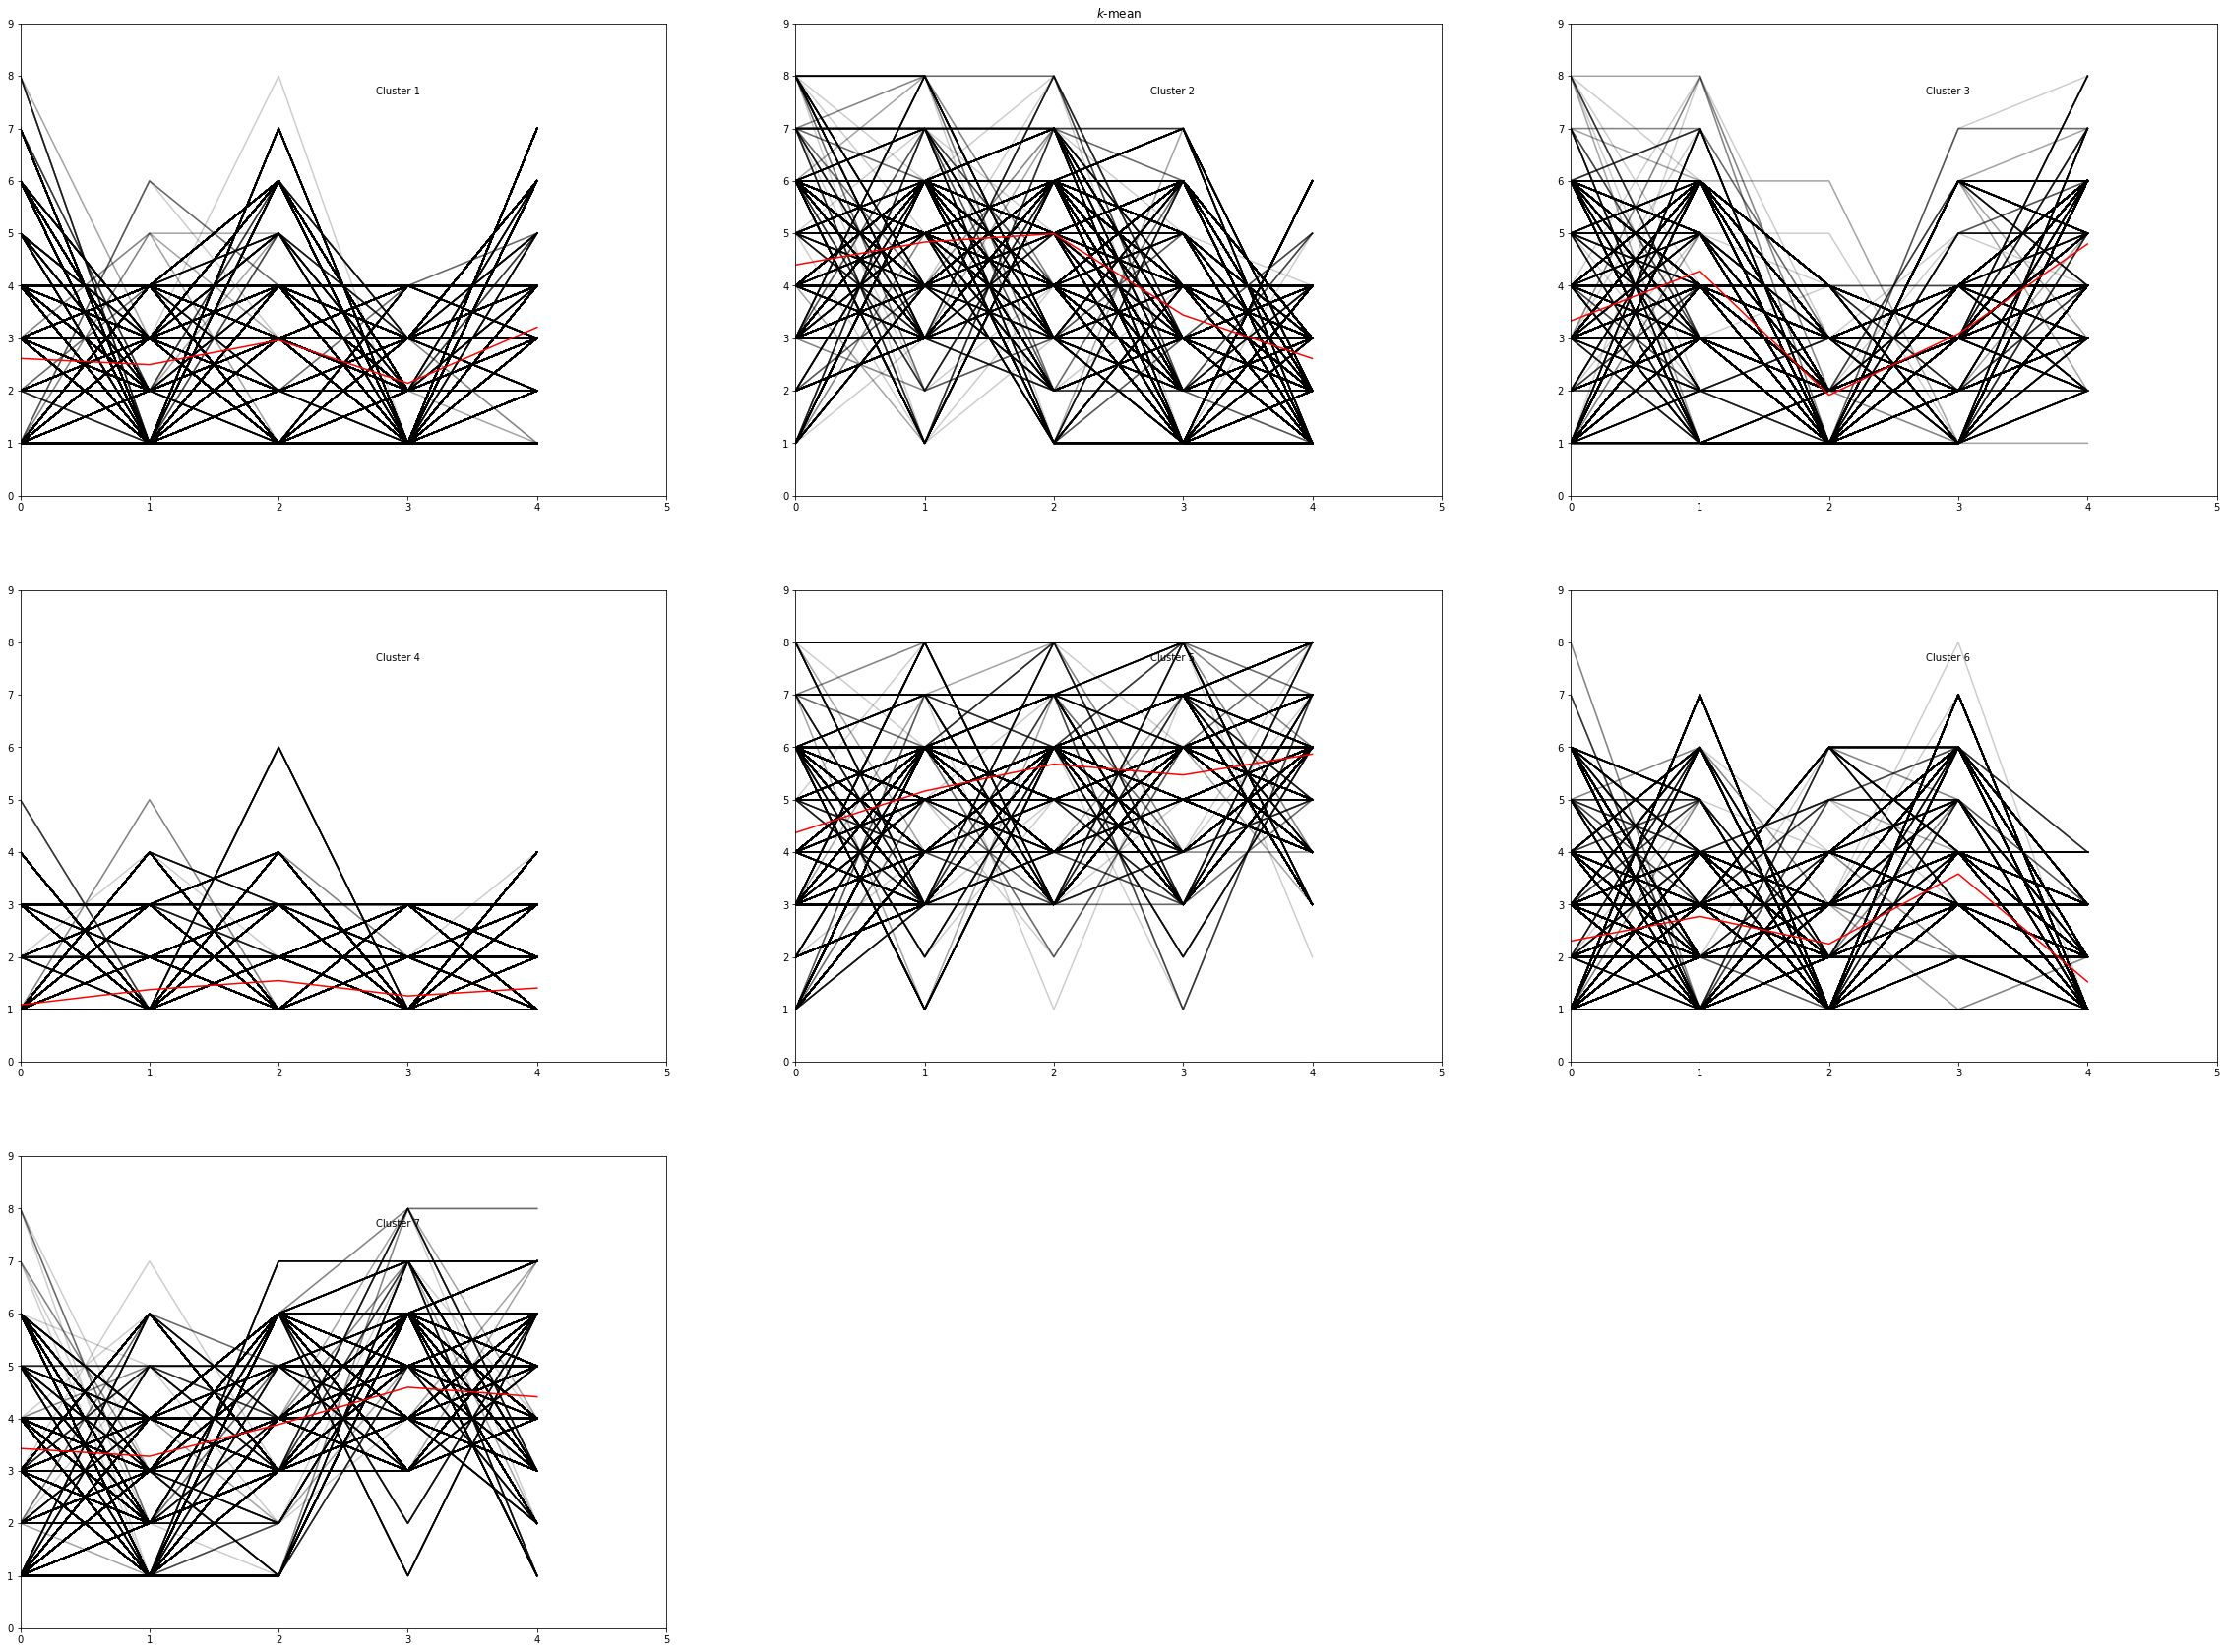

In [ ]:
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=10, random_state=0)
km_pred = km.fit_predict(x0)
plt.figure(figsize=(40, 30))
sz = x0.shape[1]
for yi in range(7):
    plt.subplot(3, 3, yi + 1)
    for xx in x0[km_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-mean")

In [ ]:
df0['cluster'] = km_pred
df0.to_csv('/content/drive/MyDrive/Lpoint hit seq time series0.csv', index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x0n = []
y0n = []
for i in df0['action_types'].values:
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = int(e)
  x0n.append(ilist[:4])
  y0n.append(ilist[-1])
x0n = np.array(x0n)
y0n = np.array(y0n)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 4
input_size = 8
hidden_size = 128
num_layers = 2
num_classes = 8
batch_size = 512
num_epochs = 100
learning_rate = 0.01

X_train, X_test, Y_train, Y_test = train_test_split(x0n, y0n)
train = CustomDataset(X_train, Y_train)
test = CustomDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    for i, (data, labels) in enumerate(train_loader):
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)

        
        # Forward pass
        outputs = model(data.to(torch.float))
        loss = criterion(outputs, labels.to(torch.int64))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)
        outputs = model(data.to(torch.float))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the LSTM model: {} %'.format(100 * correct / total)) 

Epoch [1/100], Loss: 1.4322
Epoch [2/100], Loss: 1.3866
Epoch [3/100], Loss: 1.3811
Epoch [4/100], Loss: 1.3785
Epoch [5/100], Loss: 1.3762
Epoch [6/100], Loss: 1.3753
Epoch [7/100], Loss: 1.3742
Epoch [8/100], Loss: 1.3733
Epoch [9/100], Loss: 1.3724
Epoch [10/100], Loss: 1.3719
Epoch [11/100], Loss: 1.3709
Epoch [12/100], Loss: 1.3698
Epoch [13/100], Loss: 1.3693
Epoch [14/100], Loss: 1.3681
Epoch [15/100], Loss: 1.3677
Epoch [16/100], Loss: 1.3671
Epoch [17/100], Loss: 1.3662
Epoch [18/100], Loss: 1.3656
Epoch [19/100], Loss: 1.3647
Epoch [20/100], Loss: 1.3639
Epoch [21/100], Loss: 1.3634
Epoch [22/100], Loss: 1.3629
Epoch [23/100], Loss: 1.3624
Epoch [24/100], Loss: 1.3619
Epoch [25/100], Loss: 1.3615
Epoch [26/100], Loss: 1.3606
Epoch [27/100], Loss: 1.3605
Epoch [28/100], Loss: 1.3599
Epoch [29/100], Loss: 1.3599
Epoch [30/100], Loss: 1.3592
Epoch [31/100], Loss: 1.3590
Epoch [32/100], Loss: 1.3586
Epoch [33/100], Loss: 1.3583
Epoch [34/100], Loss: 1.3586
Epoch [35/100], Loss: 1

In [ ]:
score_list = []
for c in tqdm(range(1, 8)):
  df0y = df0[df0['cluster'] == 1]
  x0y = []
  y0y = []
  for i in df0y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x0y.append(ilist[:4])
    y0y.append(ilist[-1])
  x0y = np.array(x0y)
  y0y = np.array(y0y)

  X_train, X_test, Y_train, Y_test = train_test_split(x0y, y0y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
    
  # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.6895
Epoch [2/100], Loss: 1.5765
Epoch [3/100], Loss: 1.5534
Epoch [4/100], Loss: 1.5429
Epoch [5/100], Loss: 1.5361
Epoch [6/100], Loss: 1.5294
Epoch [7/100], Loss: 1.5229
Epoch [8/100], Loss: 1.5219
Epoch [9/100], Loss: 1.5154
Epoch [10/100], Loss: 1.5120
Epoch [11/100], Loss: 1.5065
Epoch [12/100], Loss: 1.5050
Epoch [13/100], Loss: 1.5031
Epoch [14/100], Loss: 1.4990
Epoch [15/100], Loss: 1.5014
Epoch [16/100], Loss: 1.4965
Epoch [17/100], Loss: 1.4948
Epoch [18/100], Loss: 1.4926
Epoch [19/100], Loss: 1.4880
Epoch [20/100], Loss: 1.4877
Epoch [21/100], Loss: 1.4841
Epoch [22/100], Loss: 1.4809
Epoch [23/100], Loss: 1.4808
Epoch [24/100], Loss: 1.4754
Epoch [25/100], Loss: 1.4739
Epoch [26/100], Loss: 1.4720
Epoch [27/100], Loss: 1.4702
Epoch [28/100], Loss: 1.4700
Epoch [29/100], Loss: 1.4678
Epoch [30/100], Loss: 1.4667
Epoch [31/100], Loss: 1.4645
Epoch [32/100], Loss: 1.4627
Epoch [33/100], Loss: 1.4627
Epoch [34/100], Loss: 1.4586
Epoch [35/100], Loss: 1

 14%|█▍        | 1/7 [02:44<16:29, 164.88s/it]

Epoch [1/100], Loss: 1.6988
Epoch [2/100], Loss: 1.5817
Epoch [3/100], Loss: 1.5593
Epoch [4/100], Loss: 1.5490
Epoch [5/100], Loss: 1.5424
Epoch [6/100], Loss: 1.5380
Epoch [7/100], Loss: 1.5373
Epoch [8/100], Loss: 1.5303
Epoch [9/100], Loss: 1.5245
Epoch [10/100], Loss: 1.5202
Epoch [11/100], Loss: 1.5174
Epoch [12/100], Loss: 1.5191
Epoch [13/100], Loss: 1.5129
Epoch [14/100], Loss: 1.5086
Epoch [15/100], Loss: 1.5092
Epoch [16/100], Loss: 1.5084
Epoch [17/100], Loss: 1.5039
Epoch [18/100], Loss: 1.4995
Epoch [19/100], Loss: 1.4987
Epoch [20/100], Loss: 1.4959
Epoch [21/100], Loss: 1.4941
Epoch [22/100], Loss: 1.4924
Epoch [23/100], Loss: 1.4902
Epoch [24/100], Loss: 1.4870
Epoch [25/100], Loss: 1.4865
Epoch [26/100], Loss: 1.4862
Epoch [27/100], Loss: 1.4822
Epoch [28/100], Loss: 1.4822
Epoch [29/100], Loss: 1.4778
Epoch [30/100], Loss: 1.4769
Epoch [31/100], Loss: 1.4763
Epoch [32/100], Loss: 1.4762
Epoch [33/100], Loss: 1.4732
Epoch [34/100], Loss: 1.4699
Epoch [35/100], Loss: 1

 29%|██▊       | 2/7 [05:53<14:55, 179.03s/it]

Epoch [1/100], Loss: 1.6881
Epoch [2/100], Loss: 1.5901
Epoch [3/100], Loss: 1.5575
Epoch [4/100], Loss: 1.5496
Epoch [5/100], Loss: 1.5400
Epoch [6/100], Loss: 1.5357
Epoch [7/100], Loss: 1.5310
Epoch [8/100], Loss: 1.5302
Epoch [9/100], Loss: 1.5242
Epoch [10/100], Loss: 1.5203
Epoch [11/100], Loss: 1.5160
Epoch [12/100], Loss: 1.5116
Epoch [13/100], Loss: 1.5130
Epoch [14/100], Loss: 1.5110
Epoch [15/100], Loss: 1.5035
Epoch [16/100], Loss: 1.5031
Epoch [17/100], Loss: 1.4996
Epoch [18/100], Loss: 1.4984
Epoch [19/100], Loss: 1.4981
Epoch [20/100], Loss: 1.4934
Epoch [21/100], Loss: 1.4897
Epoch [22/100], Loss: 1.4870
Epoch [23/100], Loss: 1.4847
Epoch [24/100], Loss: 1.4855
Epoch [25/100], Loss: 1.4815
Epoch [26/100], Loss: 1.4801
Epoch [27/100], Loss: 1.4779
Epoch [28/100], Loss: 1.4788
Epoch [29/100], Loss: 1.4742
Epoch [30/100], Loss: 1.4716
Epoch [31/100], Loss: 1.4713
Epoch [32/100], Loss: 1.4704
Epoch [33/100], Loss: 1.4684
Epoch [34/100], Loss: 1.4667
Epoch [35/100], Loss: 1

 43%|████▎     | 3/7 [08:42<11:38, 174.52s/it]

Epoch [1/100], Loss: 1.6769
Epoch [2/100], Loss: 1.5748
Epoch [3/100], Loss: 1.5609
Epoch [4/100], Loss: 1.5515
Epoch [5/100], Loss: 1.5417
Epoch [6/100], Loss: 1.5405
Epoch [7/100], Loss: 1.5332
Epoch [8/100], Loss: 1.5289
Epoch [9/100], Loss: 1.5249
Epoch [10/100], Loss: 1.5217
Epoch [11/100], Loss: 1.5185
Epoch [12/100], Loss: 1.5188
Epoch [13/100], Loss: 1.5148
Epoch [14/100], Loss: 1.5129
Epoch [15/100], Loss: 1.5122
Epoch [16/100], Loss: 1.5072
Epoch [17/100], Loss: 1.5070
Epoch [18/100], Loss: 1.5068
Epoch [19/100], Loss: 1.5027
Epoch [20/100], Loss: 1.4992
Epoch [21/100], Loss: 1.4962
Epoch [22/100], Loss: 1.4964
Epoch [23/100], Loss: 1.4939
Epoch [24/100], Loss: 1.4913
Epoch [25/100], Loss: 1.4881
Epoch [26/100], Loss: 1.4865
Epoch [27/100], Loss: 1.4844
Epoch [28/100], Loss: 1.4820
Epoch [29/100], Loss: 1.4802
Epoch [30/100], Loss: 1.4787
Epoch [31/100], Loss: 1.4747
Epoch [32/100], Loss: 1.4733
Epoch [33/100], Loss: 1.4729
Epoch [34/100], Loss: 1.4690
Epoch [35/100], Loss: 1

 57%|█████▋    | 4/7 [11:33<08:38, 172.96s/it]

Epoch [1/100], Loss: 1.6981
Epoch [2/100], Loss: 1.5789
Epoch [3/100], Loss: 1.5540
Epoch [4/100], Loss: 1.5446
Epoch [5/100], Loss: 1.5382
Epoch [6/100], Loss: 1.5350
Epoch [7/100], Loss: 1.5272
Epoch [8/100], Loss: 1.5254
Epoch [9/100], Loss: 1.5204
Epoch [10/100], Loss: 1.5150
Epoch [11/100], Loss: 1.5138
Epoch [12/100], Loss: 1.5098
Epoch [13/100], Loss: 1.5082
Epoch [14/100], Loss: 1.5051
Epoch [15/100], Loss: 1.5019
Epoch [16/100], Loss: 1.5015
Epoch [17/100], Loss: 1.4991
Epoch [18/100], Loss: 1.4982
Epoch [19/100], Loss: 1.4962
Epoch [20/100], Loss: 1.4920
Epoch [21/100], Loss: 1.4899
Epoch [22/100], Loss: 1.4912
Epoch [23/100], Loss: 1.4874
Epoch [24/100], Loss: 1.4821
Epoch [25/100], Loss: 1.4818
Epoch [26/100], Loss: 1.4810
Epoch [27/100], Loss: 1.4780
Epoch [28/100], Loss: 1.4766
Epoch [29/100], Loss: 1.4755
Epoch [30/100], Loss: 1.4742
Epoch [31/100], Loss: 1.4701
Epoch [32/100], Loss: 1.4701
Epoch [33/100], Loss: 1.4671
Epoch [34/100], Loss: 1.4662
Epoch [35/100], Loss: 1

 71%|███████▏  | 5/7 [14:22<05:42, 171.38s/it]

Epoch [1/100], Loss: 1.6908
Epoch [2/100], Loss: 1.5861
Epoch [3/100], Loss: 1.5613
Epoch [4/100], Loss: 1.5549
Epoch [5/100], Loss: 1.5489
Epoch [6/100], Loss: 1.5439
Epoch [7/100], Loss: 1.5353
Epoch [8/100], Loss: 1.5280
Epoch [9/100], Loss: 1.5275
Epoch [10/100], Loss: 1.5211
Epoch [11/100], Loss: 1.5187
Epoch [12/100], Loss: 1.5150
Epoch [13/100], Loss: 1.5119
Epoch [14/100], Loss: 1.5139
Epoch [15/100], Loss: 1.5081
Epoch [16/100], Loss: 1.5068
Epoch [17/100], Loss: 1.5010
Epoch [18/100], Loss: 1.5000
Epoch [19/100], Loss: 1.4969
Epoch [20/100], Loss: 1.4956
Epoch [21/100], Loss: 1.4922
Epoch [22/100], Loss: 1.4906
Epoch [23/100], Loss: 1.4901
Epoch [24/100], Loss: 1.4863
Epoch [25/100], Loss: 1.4842
Epoch [26/100], Loss: 1.4836
Epoch [27/100], Loss: 1.4820
Epoch [28/100], Loss: 1.4763
Epoch [29/100], Loss: 1.4751
Epoch [30/100], Loss: 1.4753
Epoch [31/100], Loss: 1.4736
Epoch [32/100], Loss: 1.4732
Epoch [33/100], Loss: 1.4718
Epoch [34/100], Loss: 1.4691
Epoch [35/100], Loss: 1

 86%|████████▌ | 6/7 [17:13<02:51, 171.46s/it]

Epoch [1/100], Loss: 1.7036
Epoch [2/100], Loss: 1.5820
Epoch [3/100], Loss: 1.5622
Epoch [4/100], Loss: 1.5504
Epoch [5/100], Loss: 1.5444
Epoch [6/100], Loss: 1.5366
Epoch [7/100], Loss: 1.5309
Epoch [8/100], Loss: 1.5263
Epoch [9/100], Loss: 1.5205
Epoch [10/100], Loss: 1.5196
Epoch [11/100], Loss: 1.5136
Epoch [12/100], Loss: 1.5158
Epoch [13/100], Loss: 1.5127
Epoch [14/100], Loss: 1.5103
Epoch [15/100], Loss: 1.5037
Epoch [16/100], Loss: 1.5023
Epoch [17/100], Loss: 1.4983
Epoch [18/100], Loss: 1.4987
Epoch [19/100], Loss: 1.4974
Epoch [20/100], Loss: 1.4972
Epoch [21/100], Loss: 1.4933
Epoch [22/100], Loss: 1.4916
Epoch [23/100], Loss: 1.4884
Epoch [24/100], Loss: 1.4886
Epoch [25/100], Loss: 1.4844
Epoch [26/100], Loss: 1.4834
Epoch [27/100], Loss: 1.4827
Epoch [28/100], Loss: 1.4801
Epoch [29/100], Loss: 1.4773
Epoch [30/100], Loss: 1.4756
Epoch [31/100], Loss: 1.4735
Epoch [32/100], Loss: 1.4750
Epoch [33/100], Loss: 1.4716
Epoch [34/100], Loss: 1.4694
Epoch [35/100], Loss: 1

100%|██████████| 7/7 [20:03<00:00, 171.97s/it]

[37.09406494960806, 38.01791713325868, 37.29003359462486, 37.765957446808514, 37.70996640537514, 38.465845464725646, 36.786114221724524]


## len 8 이상 모두 포함

In [ ]:
df1 = df[df['num_action_type'] > 7]
x1 = []
for i in tqdm(df1['action_types'].values):
  ilist = i.split(',')
  ilist = ilist[:8]
  for j, e in enumerate(ilist):
    ilist[j] = 1 + int(e)
  x1.append(ilist)
x1 = np.array(x1)

100%|██████████| 102475/102475 [00:01<00:00, 71834.38it/s]


In [ ]:
sum = 0
for i in x1:
  if 7 in i:
    sum = sum + 1
print(sum / len(x0))

0.026724958817846294


In [ ]:
score_list = []
for max_iter in tqdm(range(1, 20)):
  km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=max_iter, random_state=0)
  km_pred = km.fit_predict(x1)
  score_list.append(silhouette_score(x1, km_pred, metric="euclidean"))
plt.plot(score_list)

In [ ]:
max_iter = np.argmax(score_list)
max_iter

In [ ]:
score_list = []
for n_clusters in tqdm(range(2, 20)):
  km = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=max_iter, random_state=0)
  km_pred = km.fit_predict(x1)
  score_list.append(silhouette_score(x1, km_pred, metric="euclidean"))
plt.plot(score_list)

In [ ]:
score_list

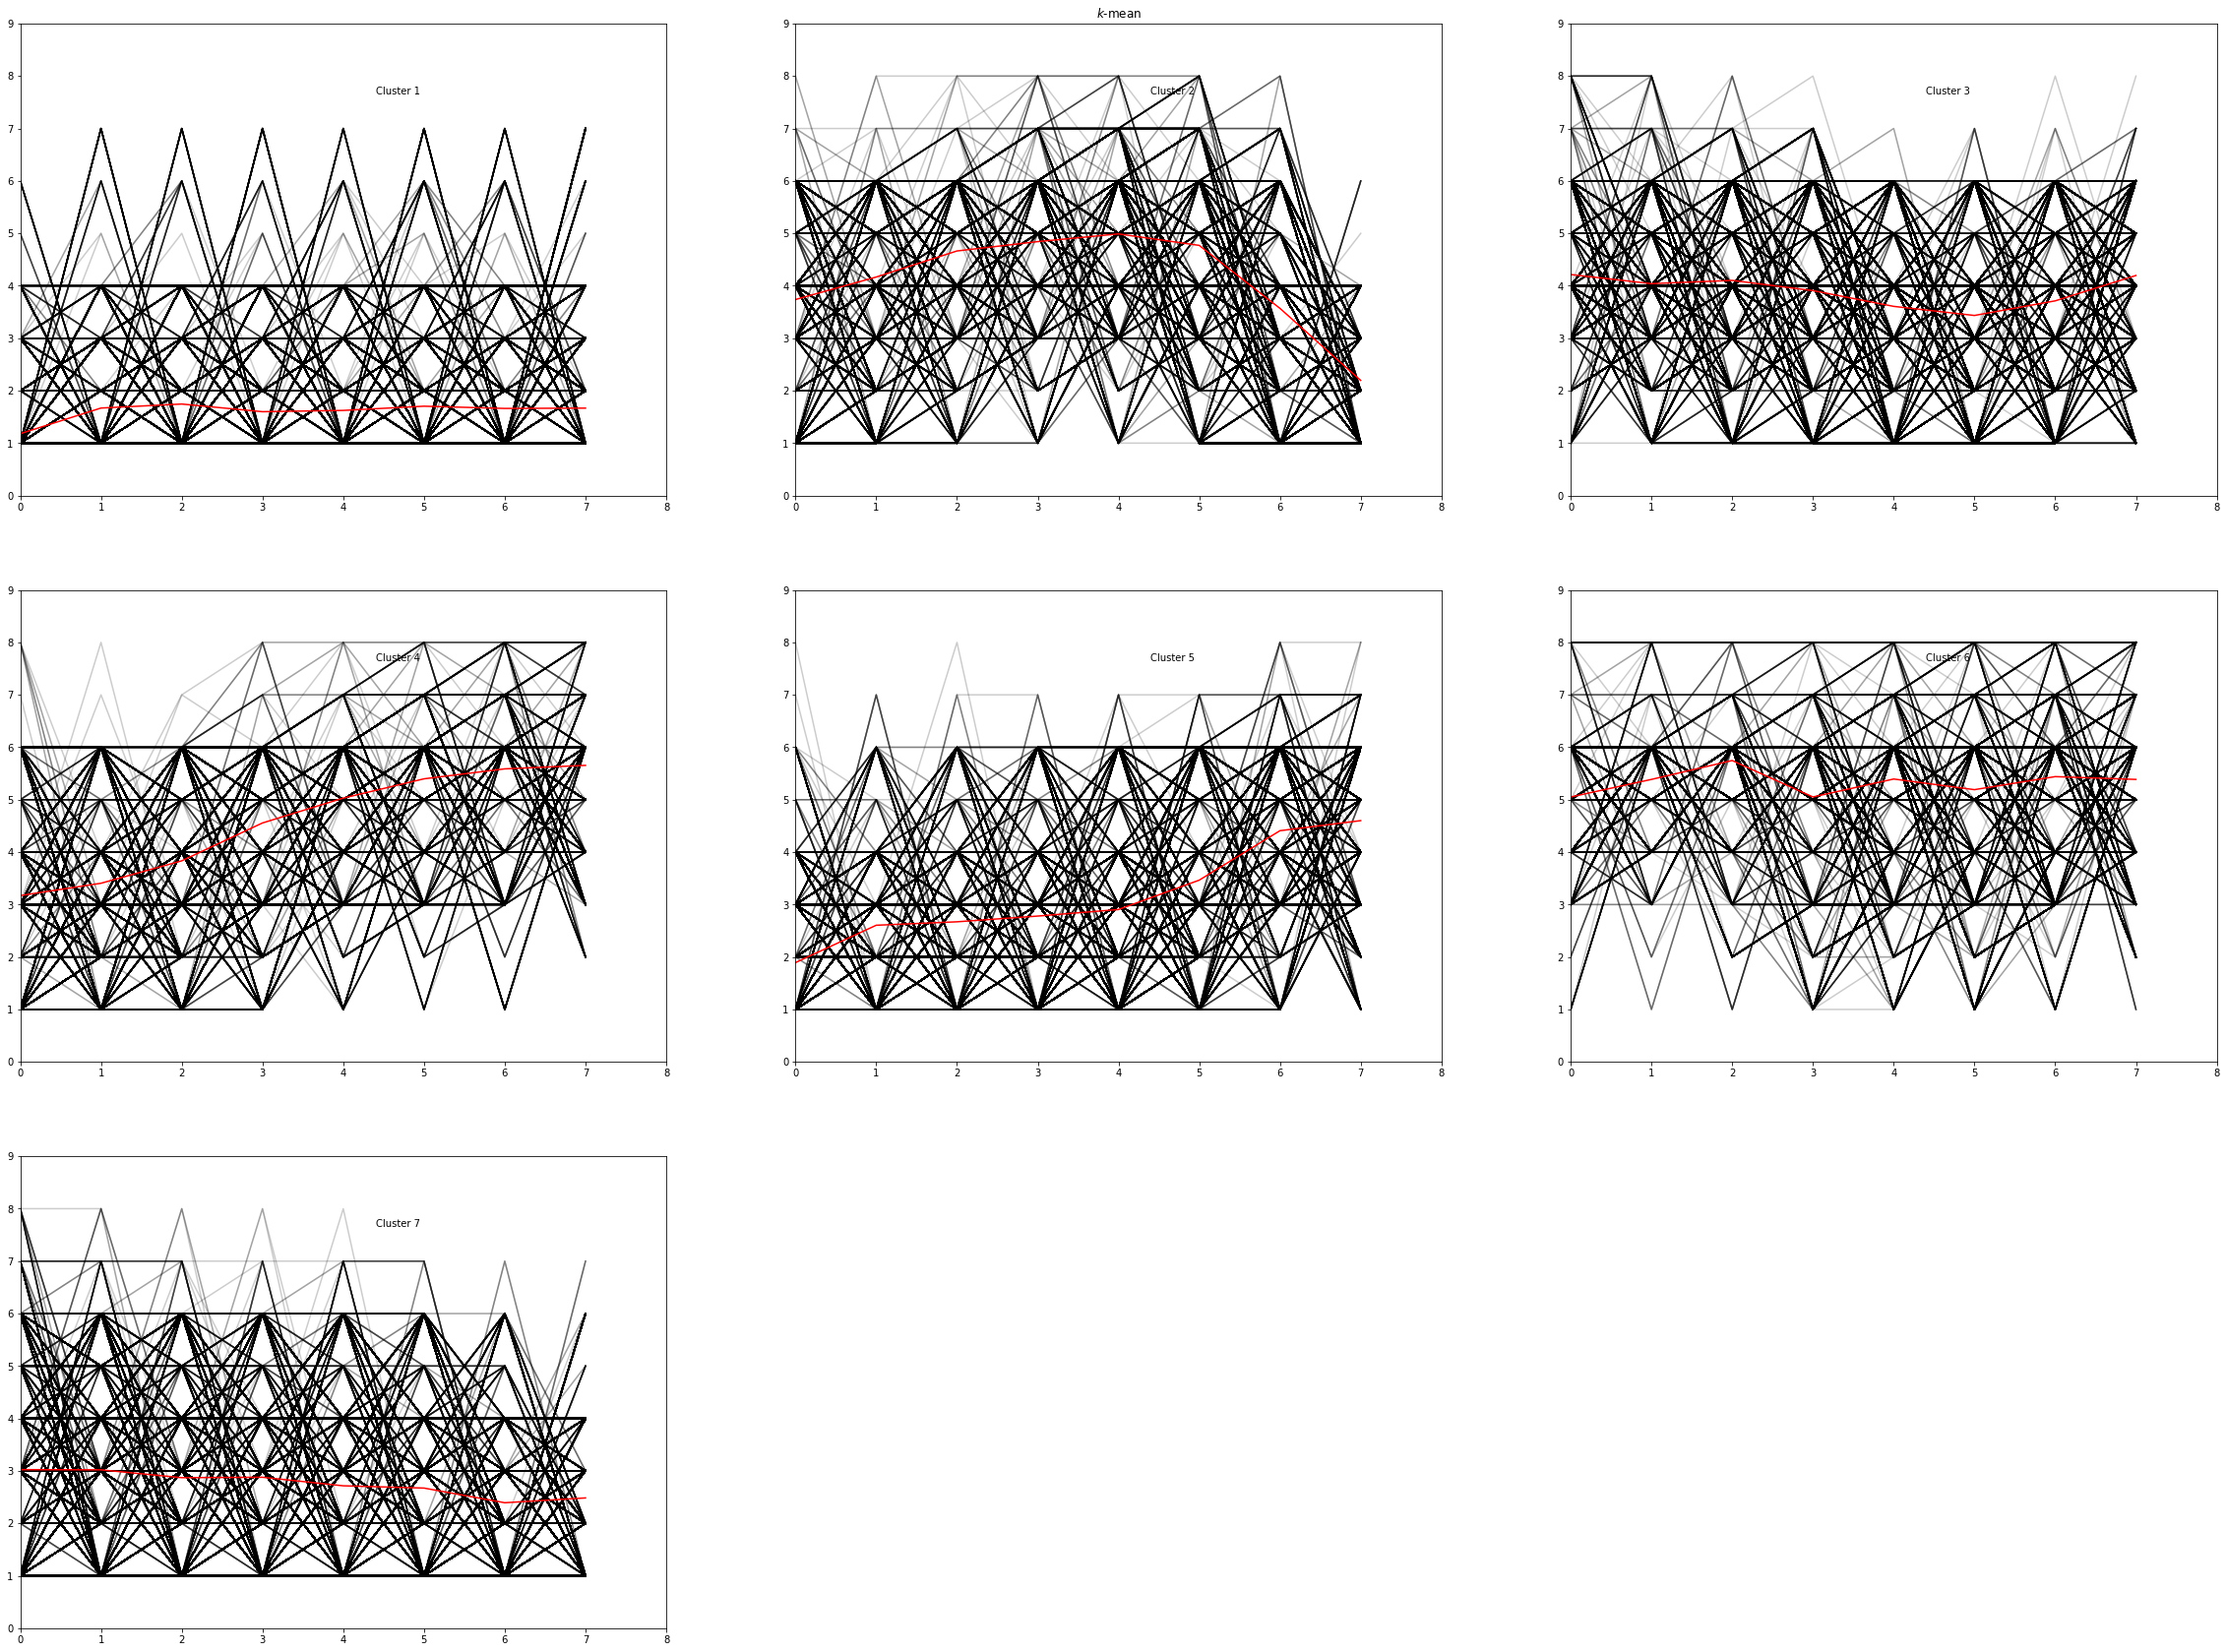

In [ ]:
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=10, random_state=0)
km_pred = km.fit_predict(x1)
plt.figure(figsize=(40, 30))
sz = x1.shape[1]
for yi in range(7):
    plt.subplot(3, 3, yi + 1)
    for xx in x1[km_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 9)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-mean")

In [ ]:
df1['cluster'] = km_pred
df1.to_csv('/content/drive/MyDrive/Lpoint hit seq time series1.csv', index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x1n = []
y1n = []
for i in df1['action_types'].values:
  ilist = i.split(',')
  for j, e in enumerate(ilist):
    ilist[j] = int(e)
  x1n.append(ilist[:7])
  y1n.append(ilist[-1])
x1n = np.array(x1n)
y1n = np.array(y1n)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 7
input_size = 8
hidden_size = 128
num_layers = 2
num_classes = 8
batch_size = 512
num_epochs = 100
learning_rate = 0.01

X_train, X_test, Y_train, Y_test = train_test_split(x1n, y1n)
train = CustomDataset(X_train, Y_train)
test = CustomDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    for i, (data, labels) in enumerate(train_loader):
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)

        
        # Forward pass
        outputs = model(data.to(torch.float))
        loss = criterion(outputs, labels.to(torch.int64))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
        labels = labels.to(device)
        outputs = model(data.to(torch.float))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the LSTM model: {} %'.format(100 * correct / total)) 

Epoch [1/100], Loss: 1.4755
Epoch [2/100], Loss: 1.4191
Epoch [3/100], Loss: 1.4107
Epoch [4/100], Loss: 1.4079
Epoch [5/100], Loss: 1.4034
Epoch [6/100], Loss: 1.4009
Epoch [7/100], Loss: 1.3985
Epoch [8/100], Loss: 1.3960
Epoch [9/100], Loss: 1.3937
Epoch [10/100], Loss: 1.3902
Epoch [11/100], Loss: 1.3871
Epoch [12/100], Loss: 1.3824
Epoch [13/100], Loss: 1.3782
Epoch [14/100], Loss: 1.3708
Epoch [15/100], Loss: 1.3649
Epoch [16/100], Loss: 1.3575
Epoch [17/100], Loss: 1.3509
Epoch [18/100], Loss: 1.3415
Epoch [19/100], Loss: 1.3307
Epoch [20/100], Loss: 1.3217
Epoch [21/100], Loss: 1.3103
Epoch [22/100], Loss: 1.3001
Epoch [23/100], Loss: 1.2890
Epoch [24/100], Loss: 1.2804
Epoch [25/100], Loss: 1.2719
Epoch [26/100], Loss: 1.2638
Epoch [27/100], Loss: 1.2542
Epoch [28/100], Loss: 1.2468
Epoch [29/100], Loss: 1.2398
Epoch [30/100], Loss: 1.2333
Epoch [31/100], Loss: 1.2281
Epoch [32/100], Loss: 1.2206
Epoch [33/100], Loss: 1.2158
Epoch [34/100], Loss: 1.2115
Epoch [35/100], Loss: 1

In [ ]:
score_list = []
for c in tqdm(range(1, 8)):
  df1y = df1[df1['cluster'] == 1]
  x1y = []
  y1y = []
  for i in df1y['action_types'].values:
    ilist = i.split(',')
    for j, e in enumerate(ilist):
      ilist[j] = int(e)
    x1y.append(ilist[:7])
    y1y.append(ilist[-1])
  x1y = np.array(x1y)
  y1y = np.array(y1y)

  X_train, X_test, Y_train, Y_test = train_test_split(x1y, y1y)
  train = CustomDataset(X_train, Y_train)
  test = CustomDataset(X_test, Y_test)
  train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle= True)
  test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size)

  model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      train_loss = 0.0
      for i, (data, labels) in enumerate(train_loader):
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)

          
          # Forward pass
          outputs = model(data.to(torch.float))
          loss = criterion(outputs, labels.to(torch.int64))
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          if (i+1) % 1000 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          train_loss += loss.item()*data.size(0)

      train_loss = train_loss/len(train_loader.sampler)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
    
  # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for data, labels in test_loader:
          data = F.one_hot(data.to(torch.int64), num_classes = 8).to(device)
          labels = labels.to(device)
          outputs = model(data.to(torch.float))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      score_list.append(100 * correct / total)

print(score_list)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/100], Loss: 1.7341
Epoch [2/100], Loss: 1.5932
Epoch [3/100], Loss: 1.5717
Epoch [4/100], Loss: 1.5644
Epoch [5/100], Loss: 1.5543
Epoch [6/100], Loss: 1.5394
Epoch [7/100], Loss: 1.5335
Epoch [8/100], Loss: 1.5246
Epoch [9/100], Loss: 1.5119
Epoch [10/100], Loss: 1.5039
Epoch [11/100], Loss: 1.4948
Epoch [12/100], Loss: 1.4892
Epoch [13/100], Loss: 1.4802
Epoch [14/100], Loss: 1.4781
Epoch [15/100], Loss: 1.4727
Epoch [16/100], Loss: 1.4675
Epoch [17/100], Loss: 1.4558
Epoch [18/100], Loss: 1.4483
Epoch [19/100], Loss: 1.4398
Epoch [20/100], Loss: 1.4227
Epoch [21/100], Loss: 1.4141
Epoch [22/100], Loss: 1.4057
Epoch [23/100], Loss: 1.3908
Epoch [24/100], Loss: 1.3755
Epoch [25/100], Loss: 1.3577
Epoch [26/100], Loss: 1.3355
Epoch [27/100], Loss: 1.3201
Epoch [28/100], Loss: 1.2943
Epoch [29/100], Loss: 1.2782
Epoch [30/100], Loss: 1.2465
Epoch [31/100], Loss: 1.2261
Epoch [32/100], Loss: 1.2110
Epoch [33/100], Loss: 1.1876
Epoch [34/100], Loss: 1.1657
Epoch [35/100], Loss: 1

 14%|█▍        | 1/7 [02:49<16:56, 169.41s/it]

Epoch [1/100], Loss: 1.7203
Epoch [2/100], Loss: 1.5827
Epoch [3/100], Loss: 1.5641
Epoch [4/100], Loss: 1.5520
Epoch [5/100], Loss: 1.5367
Epoch [6/100], Loss: 1.5245
Epoch [7/100], Loss: 1.5139
Epoch [8/100], Loss: 1.5107
Epoch [9/100], Loss: 1.5030
Epoch [10/100], Loss: 1.5010
Epoch [11/100], Loss: 1.4979
Epoch [12/100], Loss: 1.4941
Epoch [13/100], Loss: 1.4860
Epoch [14/100], Loss: 1.4816
Epoch [15/100], Loss: 1.4766
Epoch [16/100], Loss: 1.4672
Epoch [17/100], Loss: 1.4648
Epoch [18/100], Loss: 1.4584
Epoch [19/100], Loss: 1.4502
Epoch [20/100], Loss: 1.4394
Epoch [21/100], Loss: 1.4239
Epoch [22/100], Loss: 1.4199
Epoch [23/100], Loss: 1.4003
Epoch [24/100], Loss: 1.3876
Epoch [25/100], Loss: 1.3673
Epoch [26/100], Loss: 1.3481
Epoch [27/100], Loss: 1.3224
Epoch [28/100], Loss: 1.2963
Epoch [29/100], Loss: 1.2839
Epoch [30/100], Loss: 1.2672
Epoch [31/100], Loss: 1.2250
Epoch [32/100], Loss: 1.1928
Epoch [33/100], Loss: 1.1707
Epoch [34/100], Loss: 1.1528
Epoch [35/100], Loss: 1

 29%|██▊       | 2/7 [05:40<14:12, 170.54s/it]

Epoch [1/100], Loss: 1.7565
Epoch [2/100], Loss: 1.6360
Epoch [3/100], Loss: 1.5826
Epoch [4/100], Loss: 1.5652
Epoch [5/100], Loss: 1.5579
Epoch [6/100], Loss: 1.5499
Epoch [7/100], Loss: 1.5353
Epoch [8/100], Loss: 1.5270
Epoch [9/100], Loss: 1.5201
Epoch [10/100], Loss: 1.5119
Epoch [11/100], Loss: 1.5064
Epoch [12/100], Loss: 1.5026
Epoch [13/100], Loss: 1.4959
Epoch [14/100], Loss: 1.4897
Epoch [15/100], Loss: 1.4835
Epoch [16/100], Loss: 1.4783
Epoch [17/100], Loss: 1.4715
Epoch [18/100], Loss: 1.4642
Epoch [19/100], Loss: 1.4519
Epoch [20/100], Loss: 1.4409
Epoch [21/100], Loss: 1.4385
Epoch [22/100], Loss: 1.4253
Epoch [23/100], Loss: 1.4107
Epoch [24/100], Loss: 1.3992
Epoch [25/100], Loss: 1.3864
Epoch [26/100], Loss: 1.3584
Epoch [27/100], Loss: 1.3389
Epoch [28/100], Loss: 1.3183
Epoch [29/100], Loss: 1.2987
Epoch [30/100], Loss: 1.2903
Epoch [31/100], Loss: 1.2658
Epoch [32/100], Loss: 1.2396
Epoch [33/100], Loss: 1.2145
Epoch [34/100], Loss: 1.1827
Epoch [35/100], Loss: 1

 43%|████▎     | 3/7 [08:30<11:20, 170.10s/it]

Epoch [1/100], Loss: 1.7506
Epoch [2/100], Loss: 1.5872
Epoch [3/100], Loss: 1.5640
Epoch [4/100], Loss: 1.5547
Epoch [5/100], Loss: 1.5528
Epoch [6/100], Loss: 1.5404
Epoch [7/100], Loss: 1.5271
Epoch [8/100], Loss: 1.5162
Epoch [9/100], Loss: 1.5095
Epoch [10/100], Loss: 1.5019
Epoch [11/100], Loss: 1.4989
Epoch [12/100], Loss: 1.4926
Epoch [13/100], Loss: 1.4877
Epoch [14/100], Loss: 1.4884
Epoch [15/100], Loss: 1.4845
Epoch [16/100], Loss: 1.4715
Epoch [17/100], Loss: 1.4606
Epoch [18/100], Loss: 1.4511
Epoch [19/100], Loss: 1.4406
Epoch [20/100], Loss: 1.4377
Epoch [21/100], Loss: 1.4281
Epoch [22/100], Loss: 1.4122
Epoch [23/100], Loss: 1.3909
Epoch [24/100], Loss: 1.3810
Epoch [25/100], Loss: 1.3640
Epoch [26/100], Loss: 1.3367
Epoch [27/100], Loss: 1.3249
Epoch [28/100], Loss: 1.3084
Epoch [29/100], Loss: 1.2775
Epoch [30/100], Loss: 1.2563
Epoch [31/100], Loss: 1.2295
Epoch [32/100], Loss: 1.2098
Epoch [33/100], Loss: 1.1840
Epoch [34/100], Loss: 1.1626
Epoch [35/100], Loss: 1

 57%|█████▋    | 4/7 [11:19<08:29, 169.82s/it]

Epoch [1/100], Loss: 1.7002
Epoch [2/100], Loss: 1.5865
Epoch [3/100], Loss: 1.5655
Epoch [4/100], Loss: 1.5467
Epoch [5/100], Loss: 1.5362
Epoch [6/100], Loss: 1.5305
Epoch [7/100], Loss: 1.5178
Epoch [8/100], Loss: 1.5103
Epoch [9/100], Loss: 1.5079
Epoch [10/100], Loss: 1.5019
Epoch [11/100], Loss: 1.5020
Epoch [12/100], Loss: 1.4902
Epoch [13/100], Loss: 1.4812
Epoch [14/100], Loss: 1.4724
Epoch [15/100], Loss: 1.4668
Epoch [16/100], Loss: 1.4661
Epoch [17/100], Loss: 1.4533
Epoch [18/100], Loss: 1.4397
Epoch [19/100], Loss: 1.4261
Epoch [20/100], Loss: 1.4107
Epoch [21/100], Loss: 1.3939
Epoch [22/100], Loss: 1.3824
Epoch [23/100], Loss: 1.3597
Epoch [24/100], Loss: 1.3386
Epoch [25/100], Loss: 1.3266
Epoch [26/100], Loss: 1.3077
Epoch [27/100], Loss: 1.2867
Epoch [28/100], Loss: 1.2568
Epoch [29/100], Loss: 1.2342
Epoch [30/100], Loss: 1.2142
Epoch [31/100], Loss: 1.1858
Epoch [32/100], Loss: 1.1590
Epoch [33/100], Loss: 1.1431
Epoch [34/100], Loss: 1.1152
Epoch [35/100], Loss: 1

 71%|███████▏  | 5/7 [14:10<05:40, 170.01s/it]

Epoch [1/100], Loss: 1.7035
Epoch [2/100], Loss: 1.5760
Epoch [3/100], Loss: 1.5694
Epoch [4/100], Loss: 1.5593
Epoch [5/100], Loss: 1.5481
Epoch [6/100], Loss: 1.5335
Epoch [7/100], Loss: 1.5289
Epoch [8/100], Loss: 1.5258
Epoch [9/100], Loss: 1.5143
Epoch [10/100], Loss: 1.5059
Epoch [11/100], Loss: 1.5032
Epoch [12/100], Loss: 1.4972
Epoch [13/100], Loss: 1.4979
Epoch [14/100], Loss: 1.4861
Epoch [15/100], Loss: 1.4739
Epoch [16/100], Loss: 1.4681
Epoch [17/100], Loss: 1.4600
Epoch [18/100], Loss: 1.4517
Epoch [19/100], Loss: 1.4350
Epoch [20/100], Loss: 1.4263
Epoch [21/100], Loss: 1.4130
Epoch [22/100], Loss: 1.3904
Epoch [23/100], Loss: 1.3742
Epoch [24/100], Loss: 1.3510
Epoch [25/100], Loss: 1.3376
Epoch [26/100], Loss: 1.3151
Epoch [27/100], Loss: 1.2858
Epoch [28/100], Loss: 1.2616
Epoch [29/100], Loss: 1.2316
Epoch [30/100], Loss: 1.2025
Epoch [31/100], Loss: 1.1786
Epoch [32/100], Loss: 1.1571
Epoch [33/100], Loss: 1.1394
Epoch [34/100], Loss: 1.1107
Epoch [35/100], Loss: 1

 86%|████████▌ | 6/7 [17:12<02:54, 174.39s/it]

Epoch [1/100], Loss: 1.7231
Epoch [2/100], Loss: 1.5796
Epoch [3/100], Loss: 1.5606
Epoch [4/100], Loss: 1.5503
Epoch [5/100], Loss: 1.5376
Epoch [6/100], Loss: 1.5364
Epoch [7/100], Loss: 1.5242
Epoch [8/100], Loss: 1.5157
Epoch [9/100], Loss: 1.5078
Epoch [10/100], Loss: 1.5050
Epoch [11/100], Loss: 1.5050
Epoch [12/100], Loss: 1.5024
Epoch [13/100], Loss: 1.4910
Epoch [14/100], Loss: 1.4862
Epoch [15/100], Loss: 1.4770
Epoch [16/100], Loss: 1.4757
Epoch [17/100], Loss: 1.4688
Epoch [18/100], Loss: 1.4577
Epoch [19/100], Loss: 1.4499
Epoch [20/100], Loss: 1.4389
Epoch [21/100], Loss: 1.4277
Epoch [22/100], Loss: 1.4143
Epoch [23/100], Loss: 1.3973
Epoch [24/100], Loss: 1.3822
Epoch [25/100], Loss: 1.3580
Epoch [26/100], Loss: 1.3362
Epoch [27/100], Loss: 1.3079
Epoch [28/100], Loss: 1.2802
Epoch [29/100], Loss: 1.2580
Epoch [30/100], Loss: 1.2367
Epoch [31/100], Loss: 1.2075
Epoch [32/100], Loss: 1.1774
Epoch [33/100], Loss: 1.1516
Epoch [34/100], Loss: 1.1309
Epoch [35/100], Loss: 1

100%|██████████| 7/7 [20:02<00:00, 171.85s/it]

[33.165599268069535, 33.165599268069535, 31.838975297346753, 33.57731015553522, 32.93687099725526, 33.07410795974383, 33.485818847209515]
